In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

import pandas as pd

# Read the CSV file
df = pd.read_csv("SOFIFA_17_Jan_2024.csv")

# Print the first 3 rows of the DataFrame
df.head(3)

Image_URL             Name   Age  \
0  https://cdn.sofifa.net/players/239/085/24_60.p...              NaN   NaN   
1  https://cdn.sofifa.net/players/239/085/24_60.p...    E. Haaland ST  22.0   
2  https://cdn.sofifa.net/players/239/085/24_60.p...  K. Mbappé ST LW  24.0   

   Overall_rating  Potential                     Team&Contract        ID  \
0             NaN        NaN                               NaN       NaN   
1            91.0       94.0      Manchester City\n2022 ~ 2027  239085.0   
2            91.0       94.0  Paris Saint-Germain\n2018 ~ 2024  231747.0   

         Height         Weight   Foot  ...  Passing / Kicking  \
0           NaN            NaN    NaN  ...                NaN   
1  195cm / 6'5"  94kg / 207lbs   Left  ...               66.0   
2  182cm / 6'0"  75kg / 165lbs  Right  ...               80.0   

  Dribbling / Reflexes  Defending / Pace Physical / Positioning Traits  \
0                  NaN               NaN                    NaN    NaN   
1                 80.0              45.0                   88.0    NaN   
2                 92.0              36.0                   78.0    NaN   

  Traits.1                                         PlayStyles  PlayStyles +  \
0      NaN                                                NaN           NaN   
1      NaN                            Power Header Quick Step   Acrobatic +   
2      NaN  Finesse Shot Rapid Flair Trivela Acrobatic Sol...  Quick Step +   

   Number_of_playstyles   Acceleration_type  
0                   NaN                 NaN  
1                   3.0  Controlled Lengthy  
2                   7.0    Mostly Explosive  

[3 rows x 79 columns]

In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (9150, 79)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9150 entries, 0 to 9149
Data columns (total 79 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Image_URL                 8662 non-null   object 
 1   Name                      9000 non-null   object 
 2   Age                       9000 non-null   float64
 3   Overall_rating            9000 non-null   float64
 4   Potential                 9000 non-null   float64
 5   Team&Contract             9000 non-null   object 
 6   ID                        9000 non-null   float64
 7   Height                    9000 non-null   object 
 8   Weight                    9000 non-null   object 
 9   Foot                      9000 non-null   object 
 10  Best_Overall              9000 non-null   float64
 11  Best_Position             9000 non-null   object 
 12  Growth                    9000 non-null   float64
 13  Joined                    9000 non-null   object 
 14  Loan_dat

In [6]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


Age  Overall_rating    Potential             ID  Best_Overall  \
count  9000.000000     9000.000000  9000.000000    9000.000000   9000.000000   
mean     26.977444       71.353333    74.240667  232159.055556     72.176889   
std       4.301330        4.231815     5.138559   24785.978918      4.283803   
min      17.000000       66.000000    66.000000   18115.000000     66.000000   
25%      24.000000       68.000000    70.000000  215201.250000     69.000000   
50%      27.000000       70.000000    74.000000  234197.500000     71.000000   
75%      30.000000       74.000000    78.000000  251203.750000     74.000000   
max      42.000000       91.000000    94.000000  278884.000000     93.000000   

            Growth  Total_attacking     Crossing    Finishing  \
count  9000.000000      9000.000000  9000.000000  9000.000000   
mean      2.887333       276.644556    55.043222    51.743889   
std       3.716742        71.921243    17.978924    19.892110   
min       0.000000        43.000000     7.000000     3.000000   
25%       0.000000       256.000000    46.000000    37.000000   
50%       1.000000       294.000000    61.000000    58.000000   
75%       5.000000       321.000000    68.000000    68.000000   
max      20.000000       440.000000    95.000000    96.000000   

       Heading_accuracy  ...  International_reputation  Pace / Diving  \
count       9000.000000  ...               9000.000000    9000.000000   
mean          56.846444  ...                  1.177333      70.058667   
std           17.309841  ...                  0.503016      11.200240   
min            5.000000  ...                  1.000000      30.000000   
25%           50.000000  ...                  1.000000      65.000000   
50%           61.000000  ...                  1.000000      71.000000   
75%           69.000000  ...                  1.000000      78.000000   
max           93.000000  ...                  5.000000      97.000000   

       Shooting / Handling  Passing / Kicking  Dribbling / Reflexes  \
count          9000.000000        9000.000000           9000.000000   
mean             58.914000          63.552000             68.203889   
std              13.574395           8.417182              8.242888   
min              19.000000          32.000000             35.000000   
25%              50.000000          59.000000             65.000000   
50%              63.000000          64.000000             69.000000   
75%              69.000000          69.000000             73.000000   
max              93.000000          94.000000             94.000000   

       Defending / Pace  Physical / Positioning  Traits  Traits.1  \
count       9000.000000             9000.000000     0.0       0.0   
mean          55.262778               69.356222     NaN       NaN   
std           16.574379                8.243798     NaN       NaN   
min           15.000000               34.000000     NaN       NaN   
25%           40.000000               65.000000     NaN       NaN   
50%           62.000000               70.000000     NaN       NaN   
75%           68.000000               75.000000     NaN       NaN   
max           89.000000               90.000000     NaN       NaN   

       Number_of_playstyles  
count           9000.000000  
mean               1.884000  
std                1.686012  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               10.000000  

[8 rows x 60 columns]

In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # Remove Unnamed columns

print(df.columns.to_list())

['Image_URL', 'Name', 'Age', 'Overall_rating', 'Potential', 'Team&Contract', 'ID', 'Height', 'Weight', 'Foot', 'Best_Overall', 'Best_Position', 'Growth', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending', 'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats', 'Base_stats', 'Weak_foot', 'Skill_moves', 'Attacking_work_rate', 'Defensive_work_rate', 'International_reputation', 'Body_type', 'Real_face', 'Pace / Diving', 'Shooting / Han

In [8]:
numerical_columns = df.select_dtypes(include=['number', 'float', 'int']).columns.tolist()
print("Numerical Columns:")
print(numerical_columns)
print(f"Number of numeric columns: {len(numerical_columns)}")

Numerical Columns:
['Age', 'Overall_rating', 'Potential', 'ID', 'Best_Overall', 'Growth', 'Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending', 'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats', 'Base_stats', 'Weak_foot', 'Skill_moves', 'International_reputation', 'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace', 'Physical / Positioning', 'Traits', 'Traits.1', 'Number_of_playstyles']
Number of numeric columns: 60


In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist() # Select categorical columns
print("Categorical Columns:")
print(categorical_columns)
print(f"Number of categorical columns: {len(categorical_columns)}")

Categorical Columns:
['Image_URL', 'Name', 'Team&Contract', 'Height', 'Weight', 'Foot', 'Best_Position', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Attacking_work_rate', 'Defensive_work_rate', 'Body_type', 'Real_face', 'PlayStyles', 'PlayStyles +', 'Acceleration_type']
Number of categorical columns: 19


In [10]:
# Print the count of missing values per column
print("Missing Values Count per Column:")
print("-" * 40)
# Calculer la somme des valeurs nulles (NaN)
null_values_sum = df.isnull().sum()
print(null_values_sum.to_string())
print("-" * 40)

Missing Values Count per Column:
----------------------------------------
Image_URL                    488
Name                         150
Age                          150
Overall_rating               150
Potential                    150
Team&Contract                150
ID                           150
Height                       150
Weight                       150
Foot                         150
Best_Overall                 150
Best_Position                150
Growth                       150
Joined                       150
Loan_date_end               8536
Value                        150
Wage                         150
Release_clause               150
Total_attacking              150
Crossing                     150
Finishing                    150
Heading_accuracy             150
Short_passing                150
Volleys                      150
Total_skill                  150
Dribbling                    150
Curve                        150
FK_Accuracy                  150
Lo

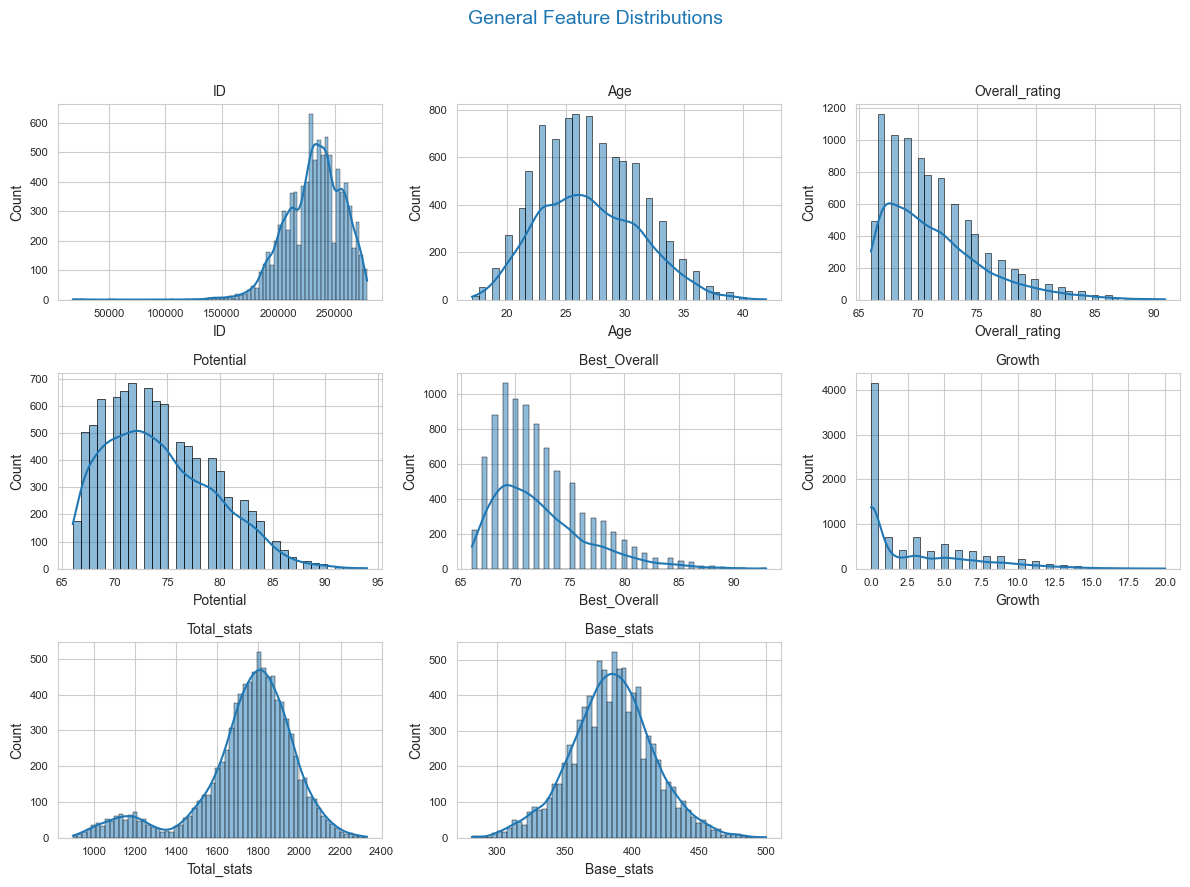

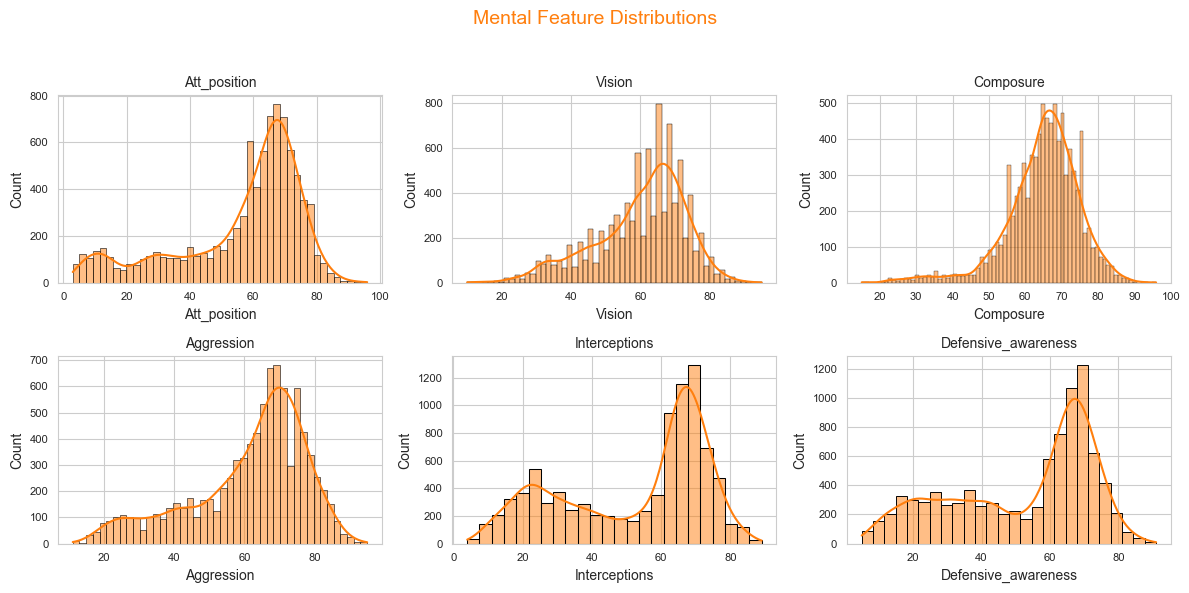

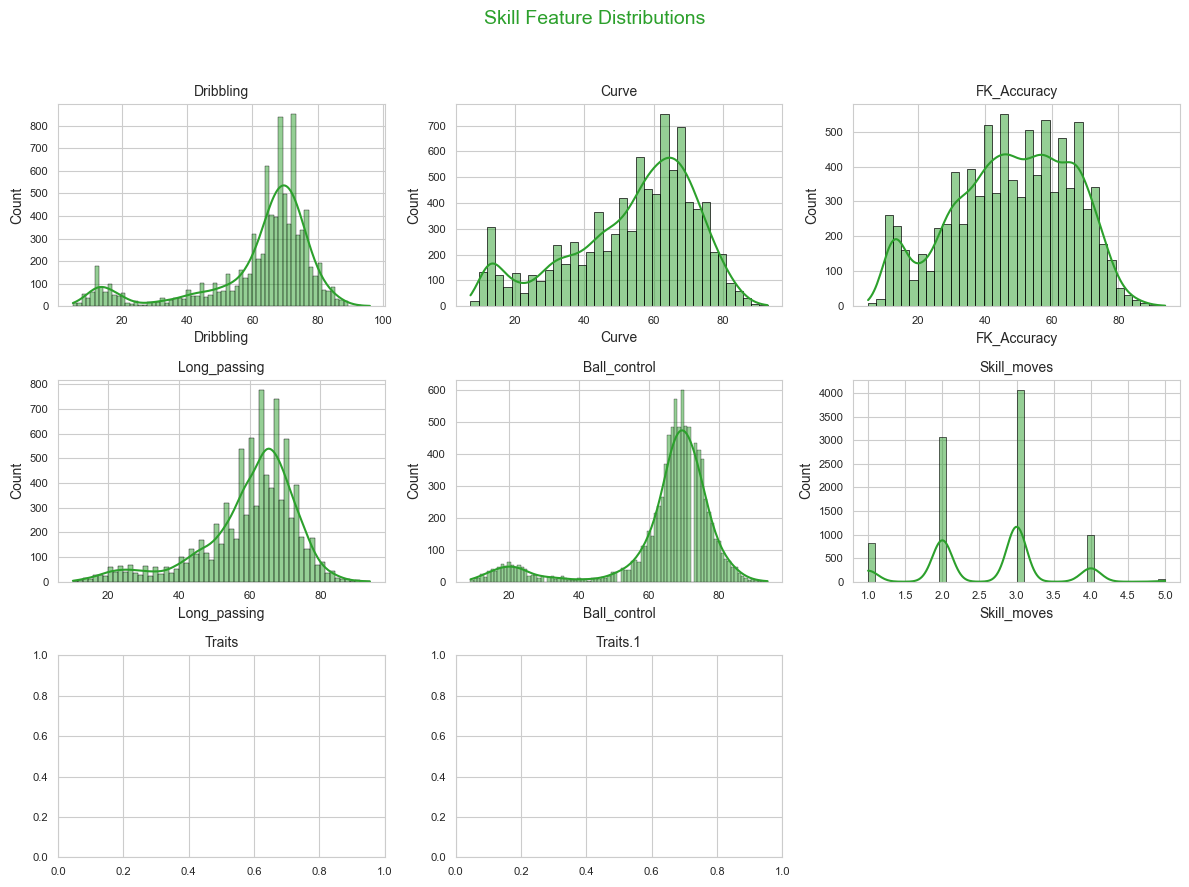

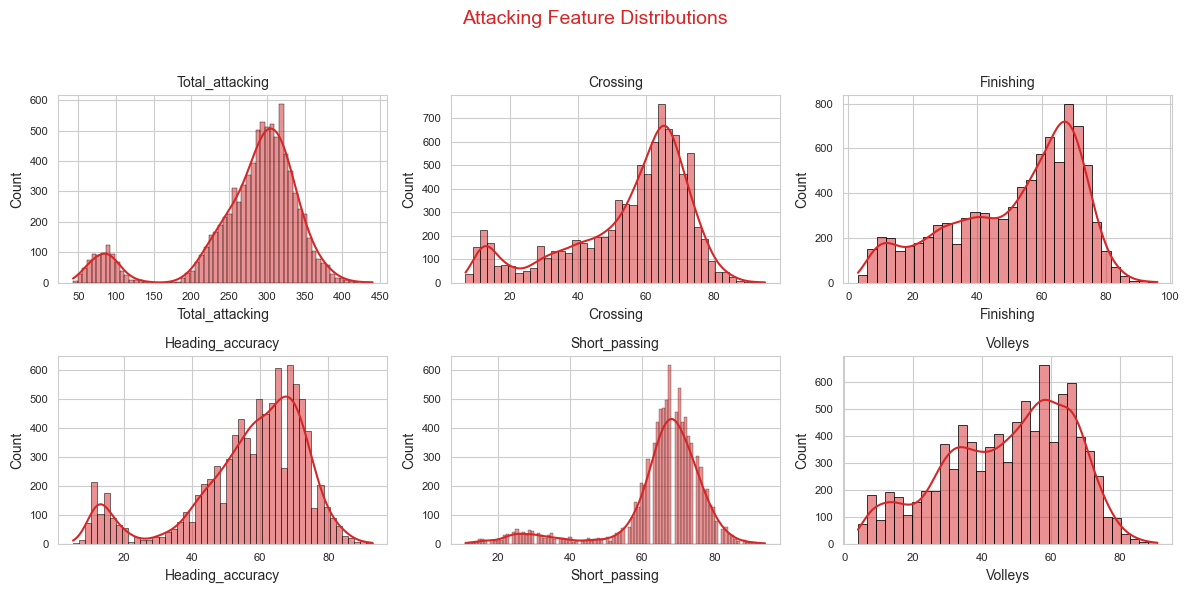

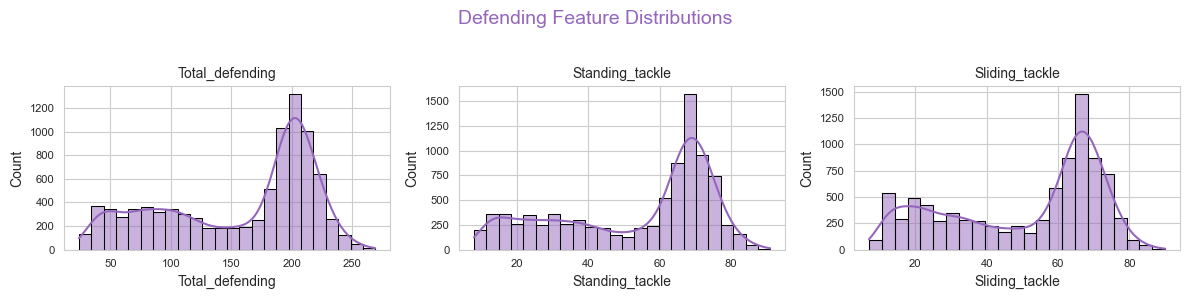

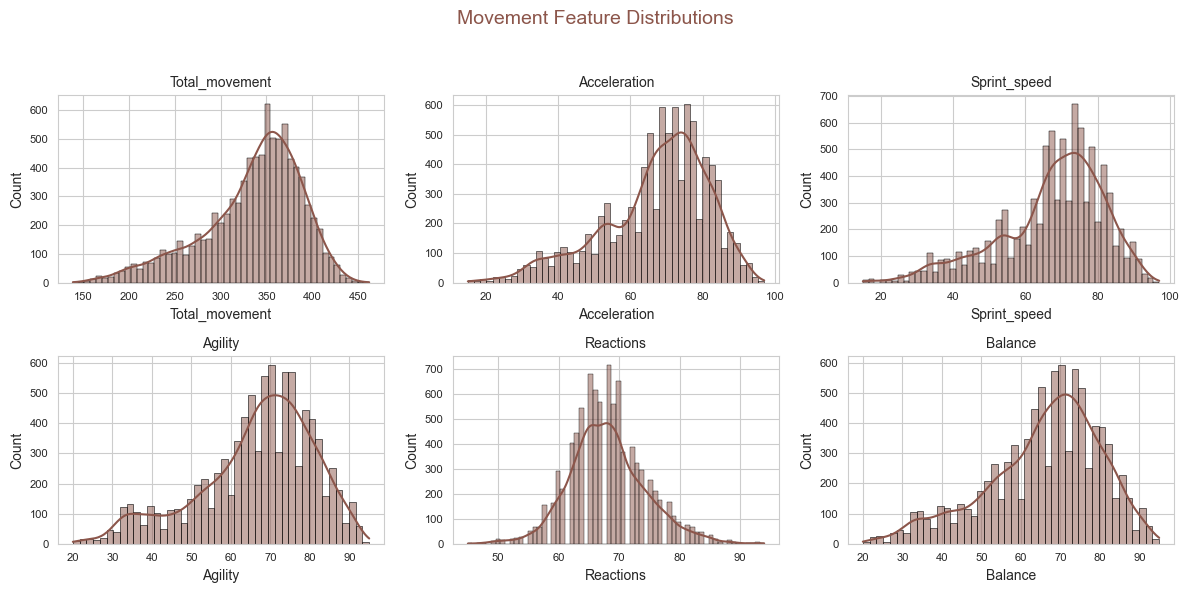

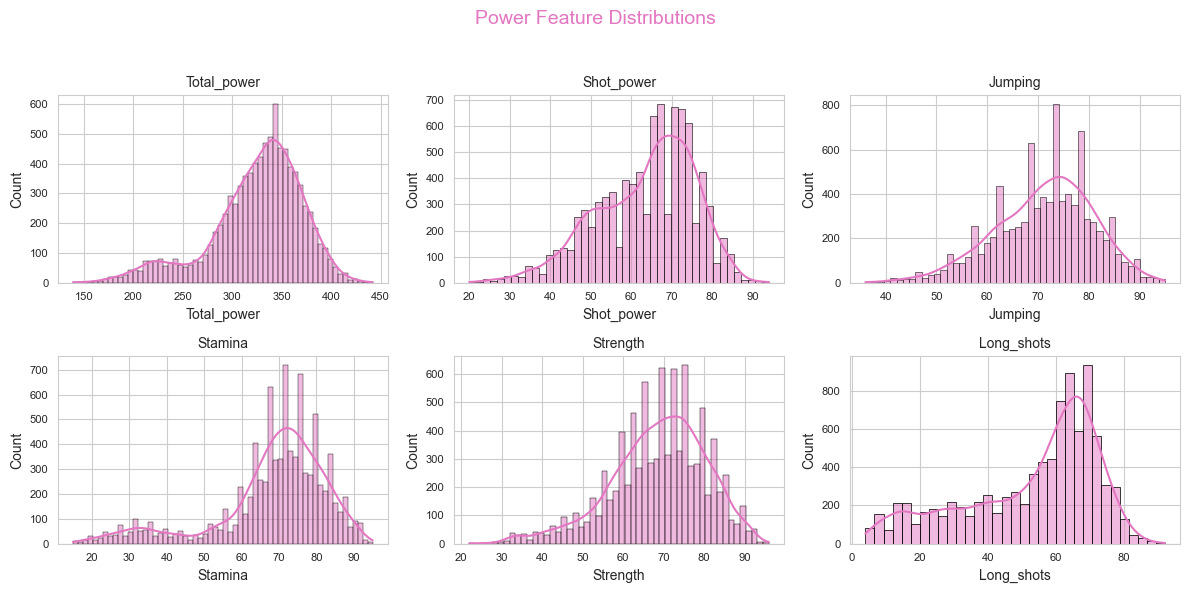

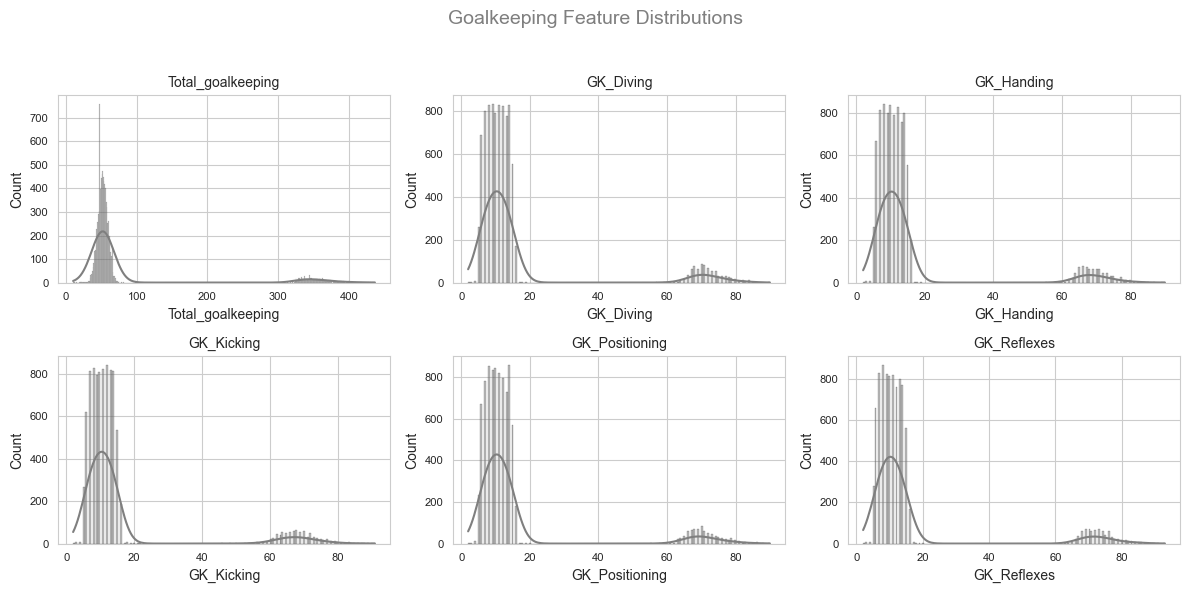

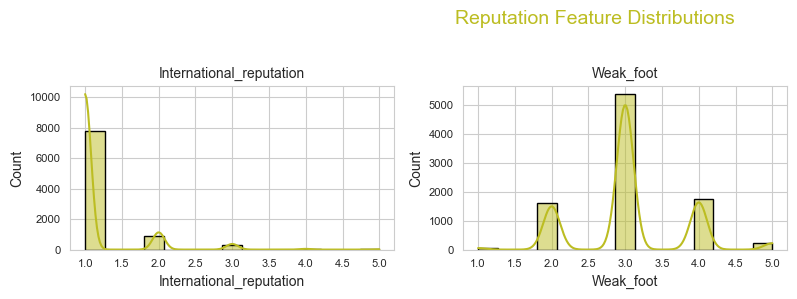

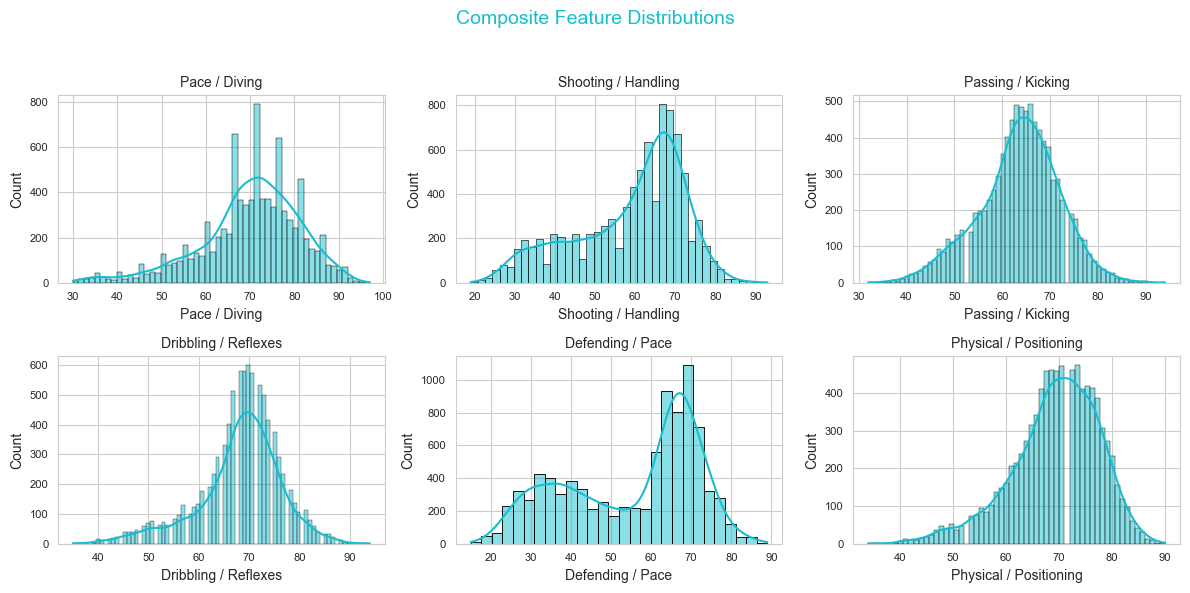

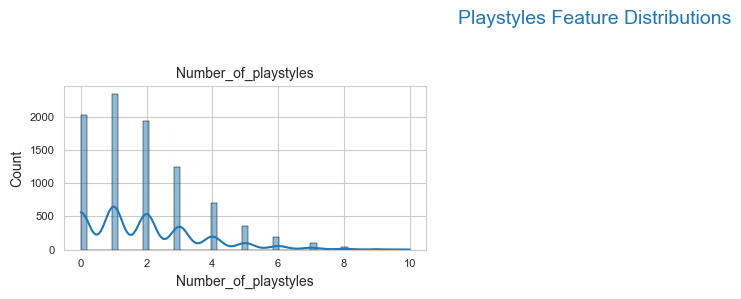

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_style("whitegrid")

# Define numerical features and categories
numerical_features = ['Age', 'Overall_rating', 'Potential', 'ID', 'Best_Overall', 'Growth', 'Total_attacking',
                      'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill',
                      'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Total_movement',
                      'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Total_power',
                      'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions',
                      'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending',
                      'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle', 'Total_goalkeeping',
                      'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
                      'Base_stats', 'Weak_foot', 'Skill_moves', 'International_reputation', 'Pace / Diving',
                      'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace',
                      'Physical / Positioning', 'Traits', 'Traits.1', 'Number_of_playstyles']

feature_groups = {
    'General': ['ID', 'Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Category-specific color palettes (optional tweak)
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Filter features actually in df
filtered_feature_groups = {
    group: [feat for feat in feats if feat in df.columns]
    for group, feats in feature_groups.items()
}

# Plotting: all features per group side by side
for group_name, features in filtered_feature_groups.items():
    n = len(features)
    cols = 3  # number of subplots per row
    rows = (n + cols - 1) // cols  # compute needed rows

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    fig.suptitle(f'{group_name} Feature Distributions', fontsize=14, color=group_color_map[group_name])
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(df[feature].dropna(), kde=True, ax=axes[i],
                     color=group_color_map[group_name], edgecolor='black')
        axes[i].set_title(feature, fontsize=10)
        axes[i].tick_params(axis='x', labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


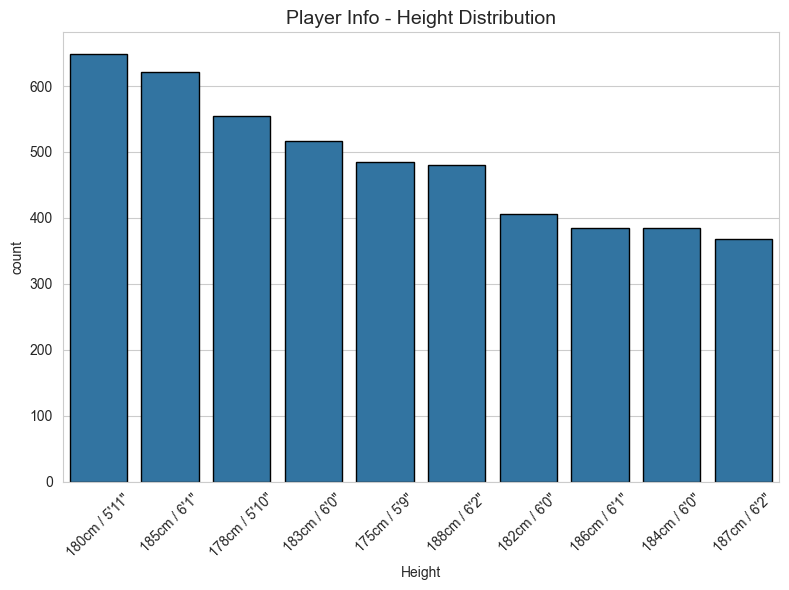

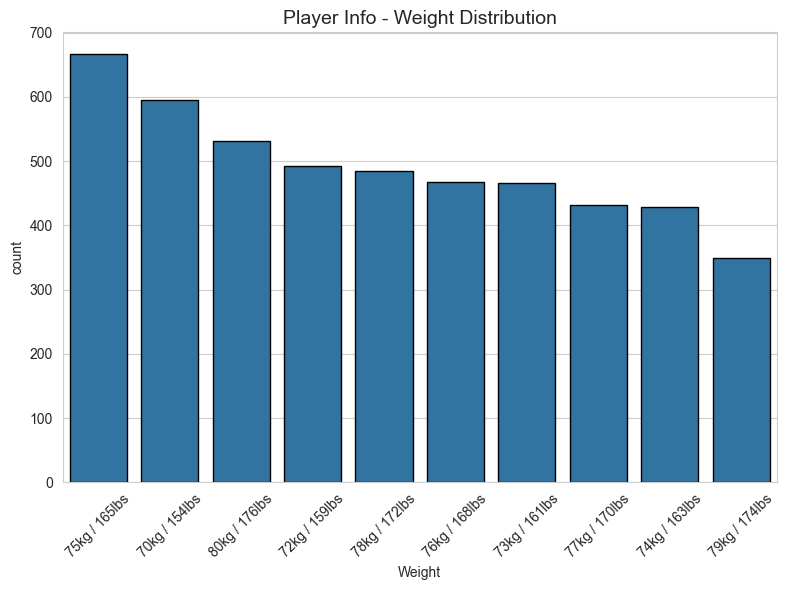

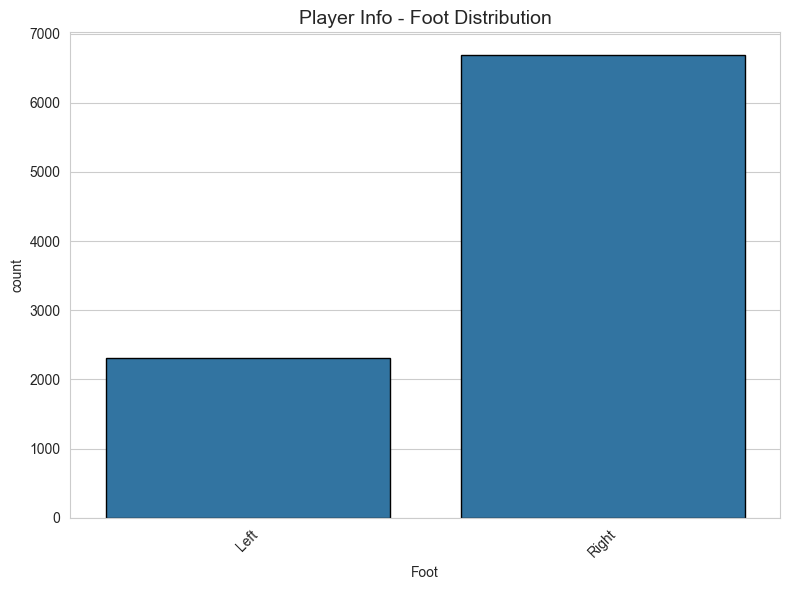

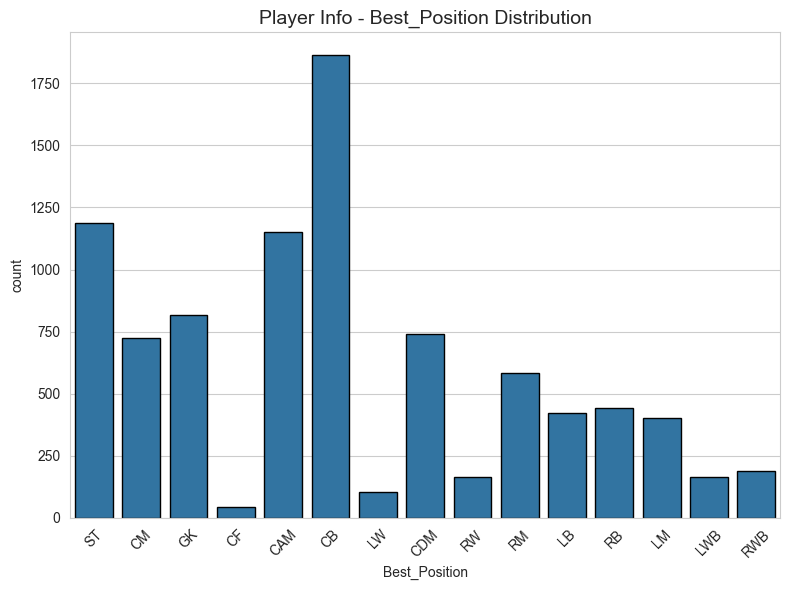

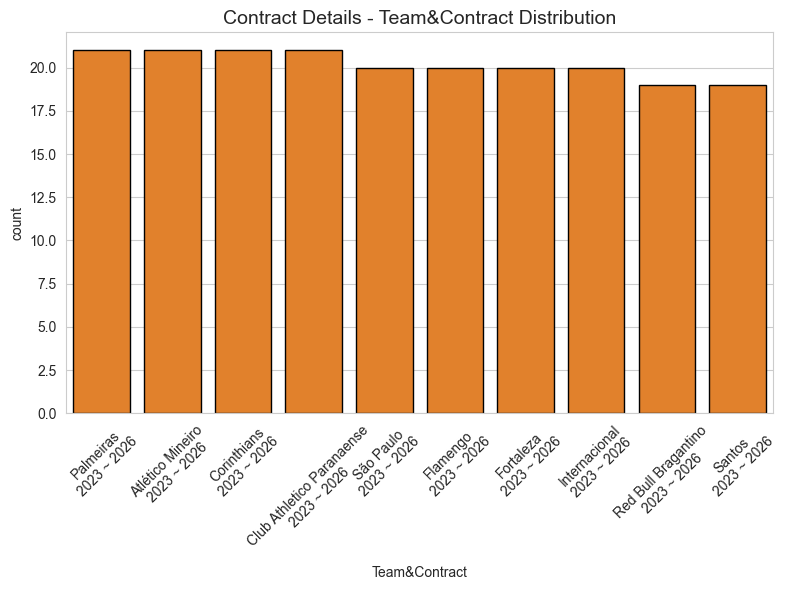

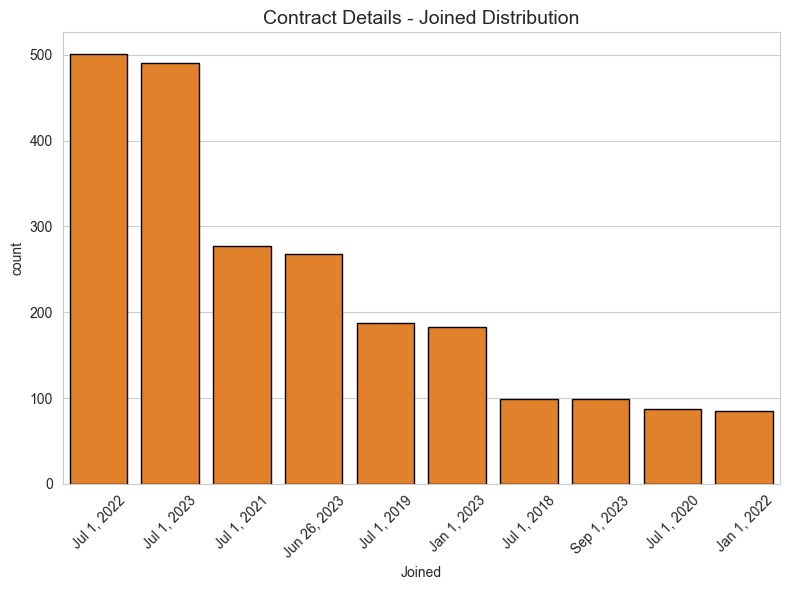

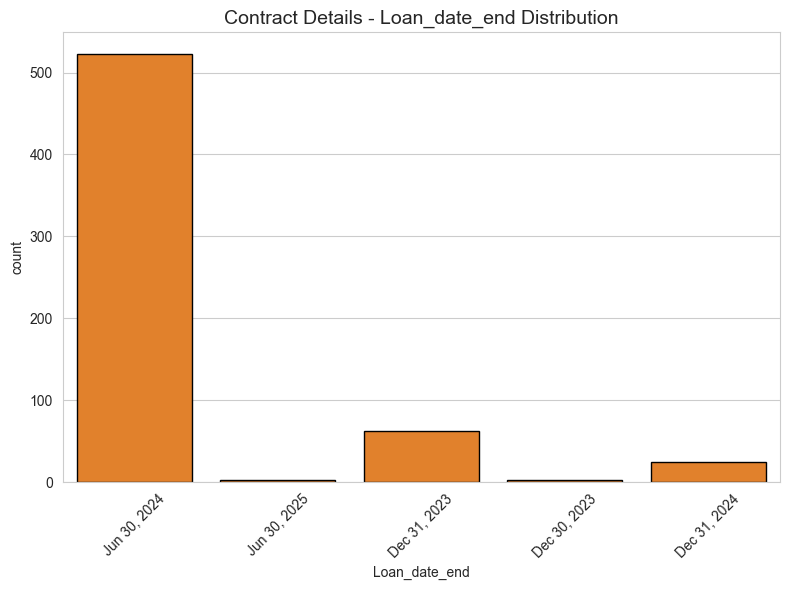

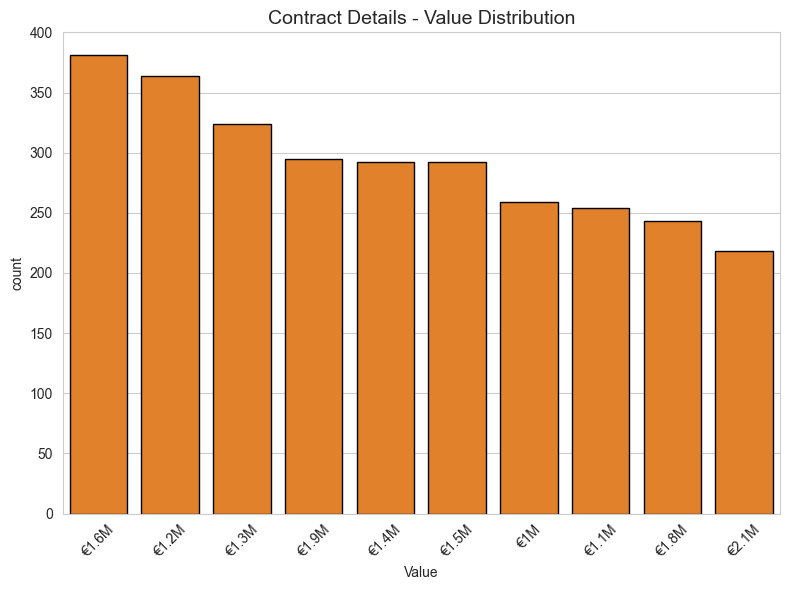

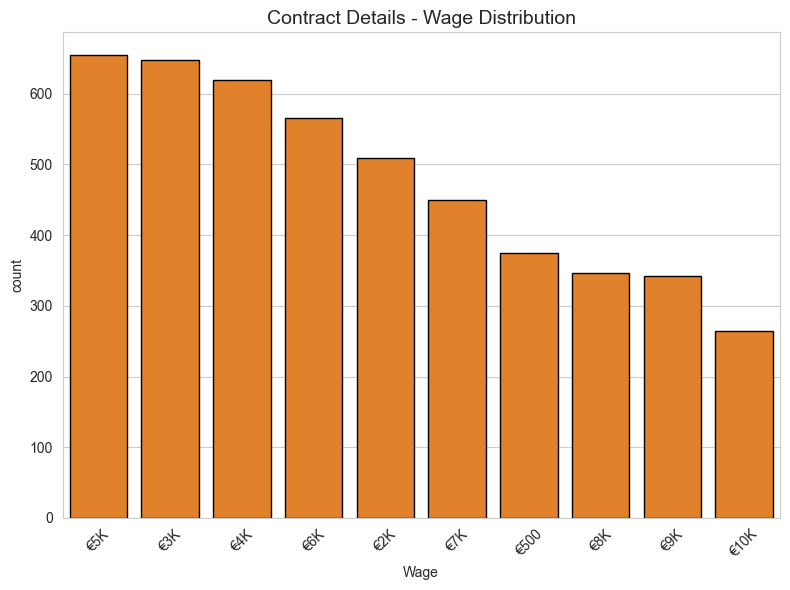

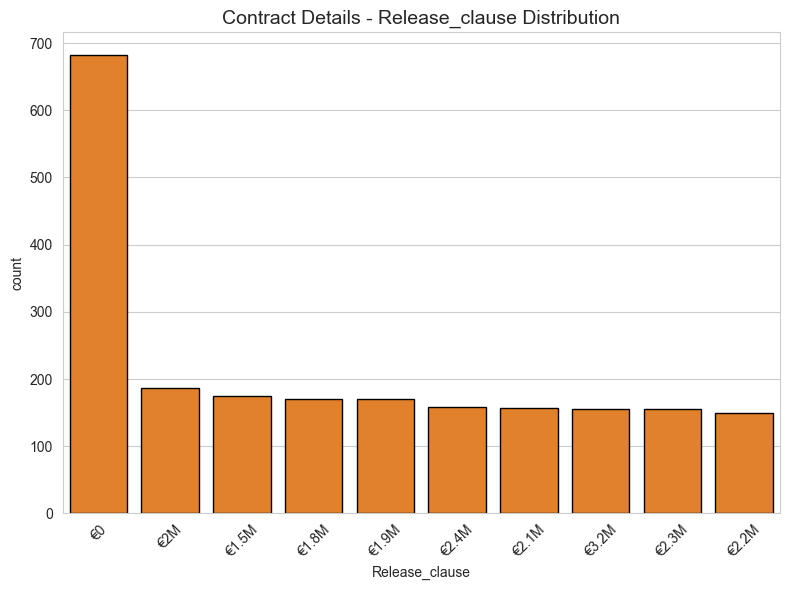

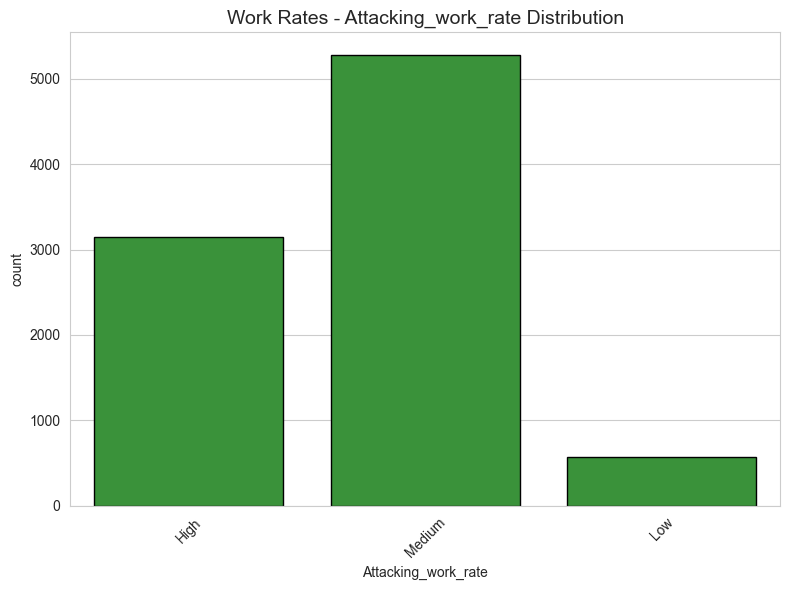

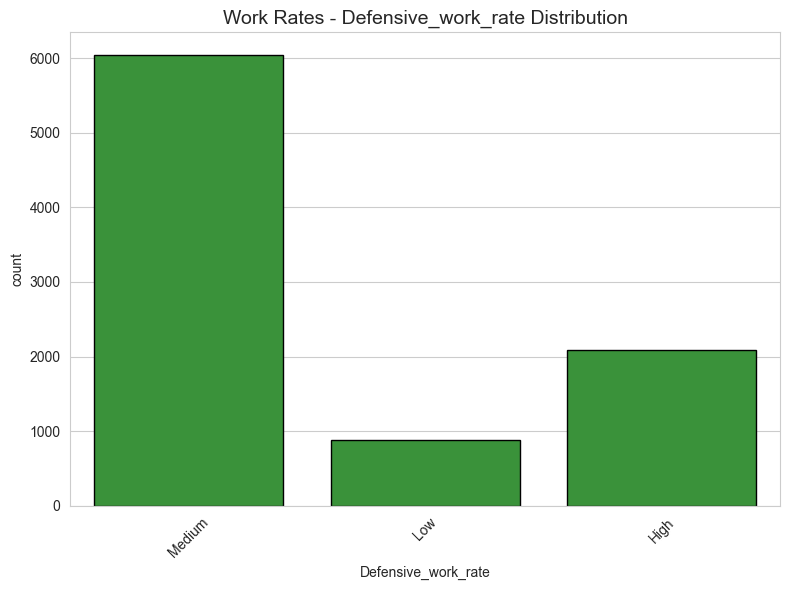

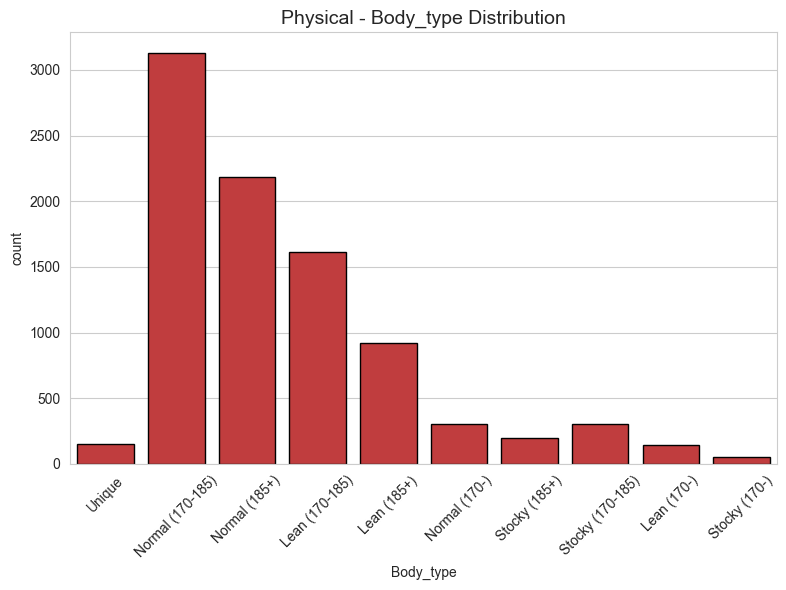

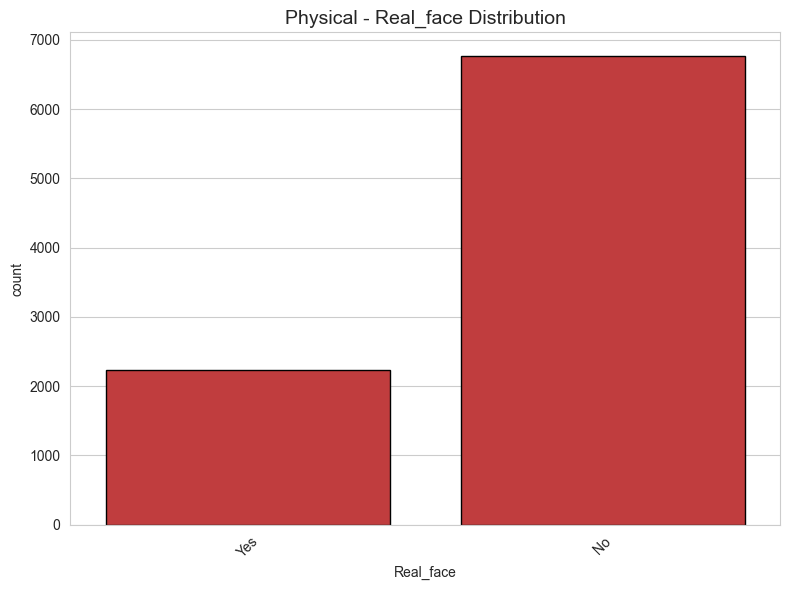

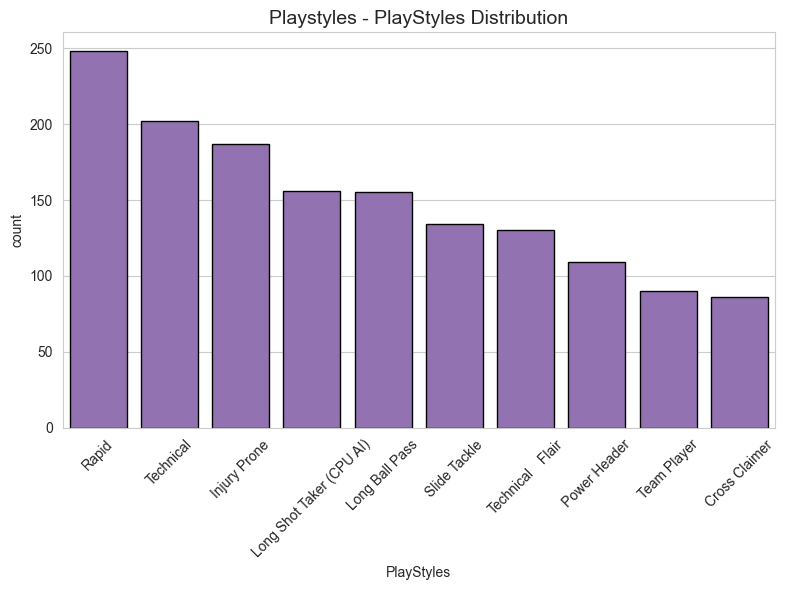

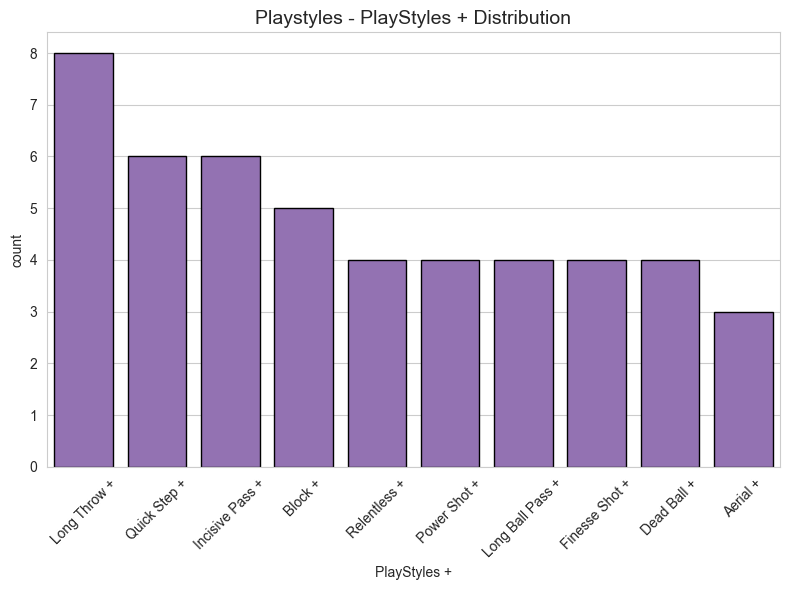

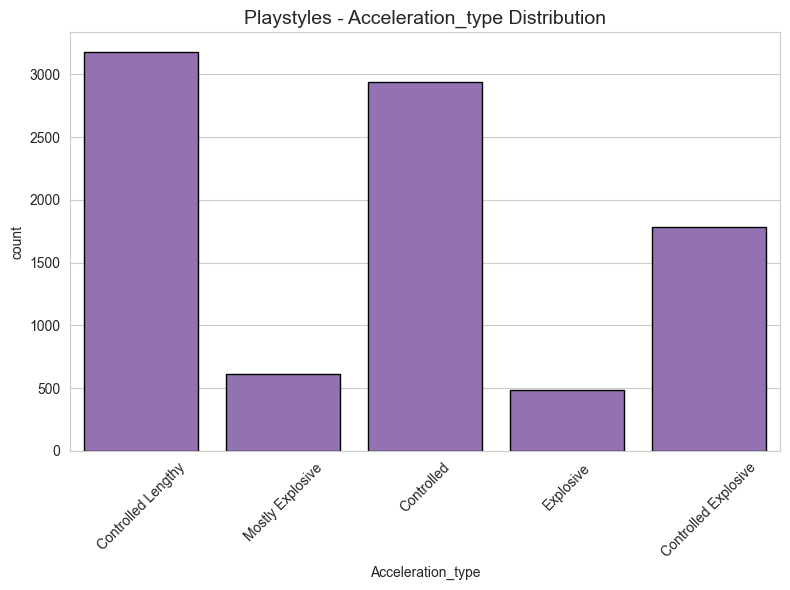

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_style("whitegrid")

# Define categorical features and categories
categorical_features = ['Team&Contract', 'Height', 'Weight', 'Foot',
                        'Best_Position', 'Joined', 'Loan_date_end', 'Value', 'Wage',
                        'Release_clause', 'Attacking_work_rate', 'Defensive_work_rate',
                        'Body_type', 'Real_face', 'PlayStyles', 'PlayStyles +', 'Acceleration_type']

feature_groups = {
    'Player Info': [ 'Height', 'Weight', 'Foot', 'Best_Position'],
    'Contract Details': ['Team&Contract', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause'],
    'Work Rates': ['Attacking_work_rate', 'Defensive_work_rate'],
    'Physical': ['Body_type', 'Real_face'],
    'Playstyles': ['PlayStyles', 'PlayStyles +', 'Acceleration_type']
}

# Category-specific color palettes
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Filter features actually in df
filtered_feature_groups = {
    group: [feat for feat in feats if feat in df.columns]
    for group, feats in feature_groups.items()
}

# Plotting: each feature in a separate figure, one under the other
for group_name, features in filtered_feature_groups.items():
    for feature in features:
        # Create a new figure for each plot (one under the other)
        plt.figure(figsize=(8, 6))  # Adjusting the overall figure size

        # Only show the top 10 categories if there are more than 20 unique categories
        if df[feature].nunique() > 20:
            top_categories = df[feature].value_counts().nlargest(10).index
            sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
        else:
            sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')

        plt.title(f'{group_name} - {feature} Distribution', fontsize=14)
        plt.tick_params(axis='x', labelsize=10, rotation=45)  # Rotate x-axis labels if needed
        plt.tick_params(axis='y', labelsize=10)
        plt.tight_layout()
        plt.show()


In [13]:
# Dropping the specified columns from the DataFrame
df = df.drop(columns=['Image_URL', 'Name', 'ID', 'Traits', 'Traits.1'])

# Verify that the columns have been dropped
print(df.columns.to_list())

['Age', 'Overall_rating', 'Potential', 'Team&Contract', 'Height', 'Weight', 'Foot', 'Best_Overall', 'Best_Position', 'Growth', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending', 'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats', 'Base_stats', 'Weak_foot', 'Skill_moves', 'Attacking_work_rate', 'Defensive_work_rate', 'International_reputation', 'Body_type', 'Real_face', 'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking'

In [14]:
import pandas as pd

# Replace missing values in numerical columns with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Replace missing values in categorical columns with the most frequent value (mode)
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Confirm that missing values are replaced
print("Missing values after replacement:")
print(df.isnull().sum().to_string())

Missing values after replacement:
Age                         0
Overall_rating              0
Potential                   0
Team&Contract               0
Height                      0
Weight                      0
Foot                        0
Best_Overall                0
Best_Position               0
Growth                      0
Joined                      0
Loan_date_end               0
Value                       0
Wage                        0
Release_clause              0
Total_attacking             0
Crossing                    0
Finishing                   0
Heading_accuracy            0
Short_passing               0
Volleys                     0
Total_skill                 0
Dribbling                   0
Curve                       0
FK_Accuracy                 0
Long_passing                0
Ball_control                0
Total_movement              0
Acceleration                0
Sprint_speed                0
Agility                     0
Reactions                   0
Balanc

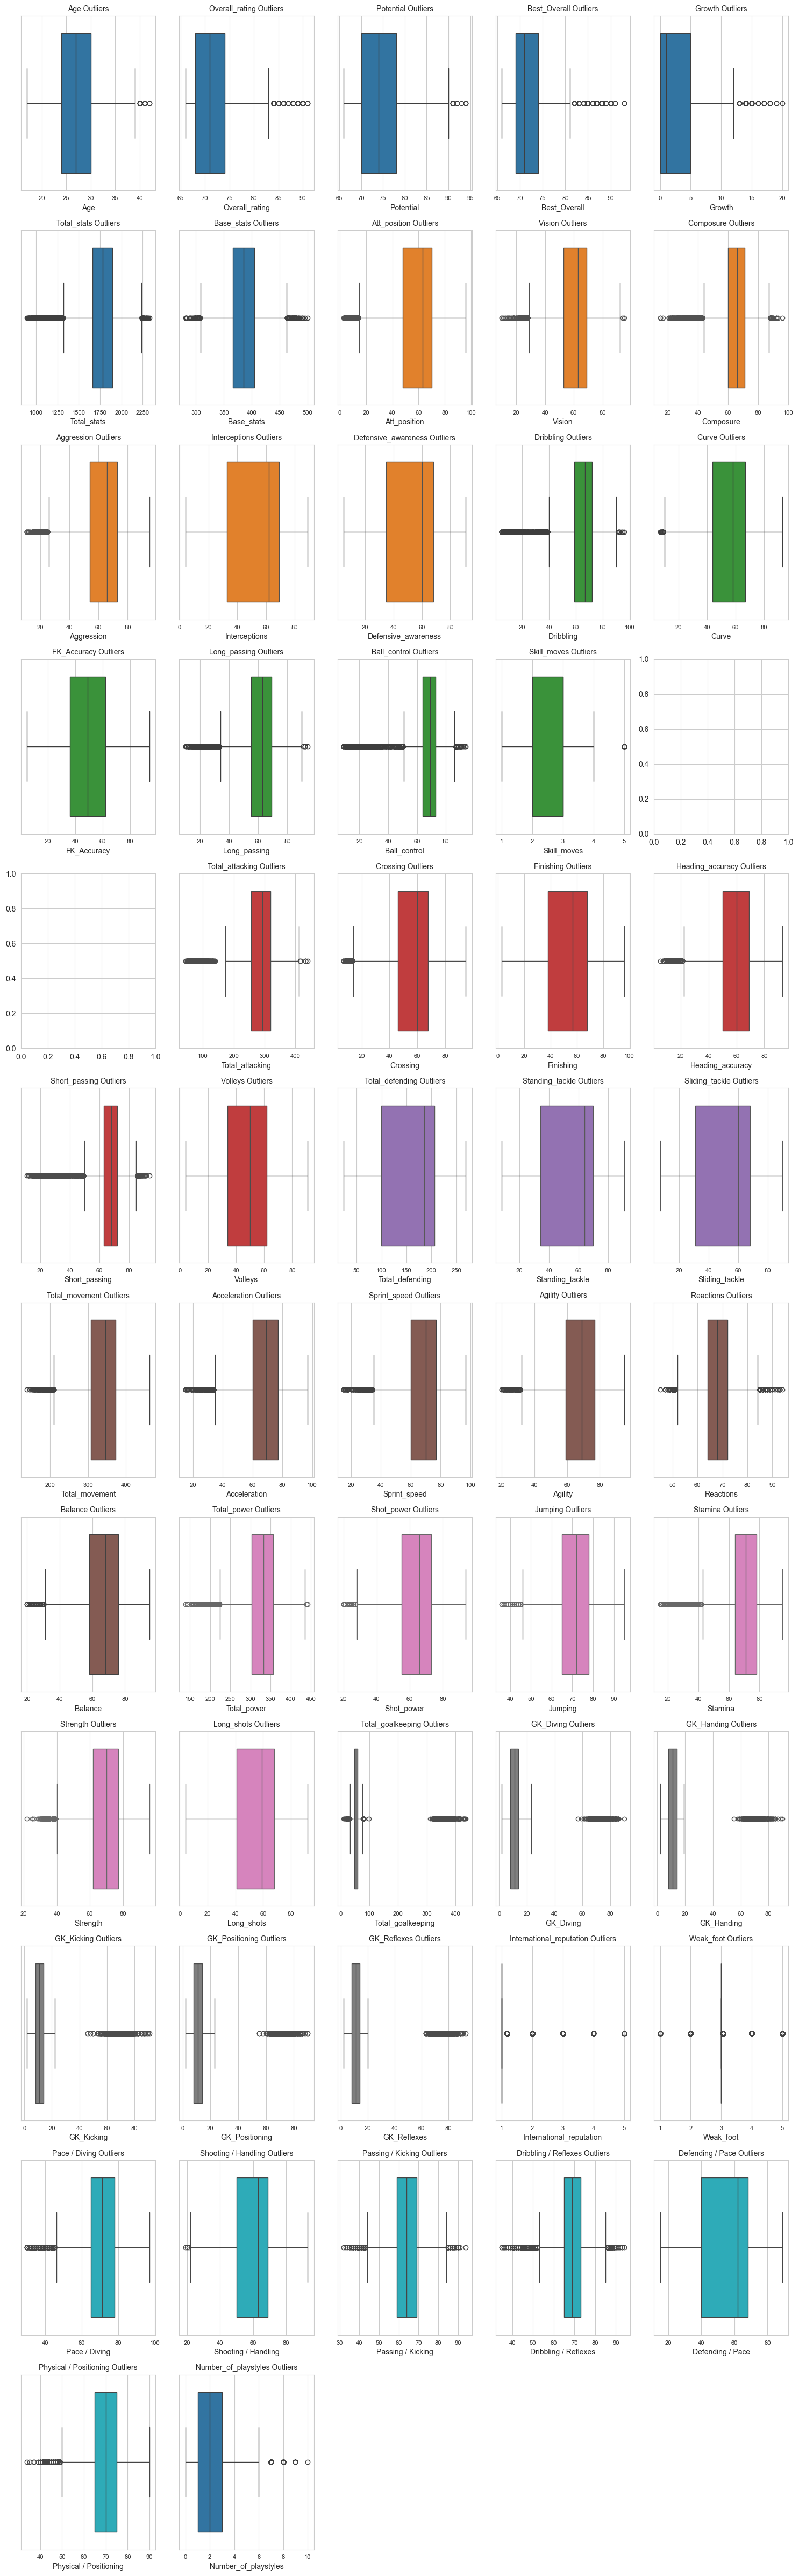

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame with the data


# Feature groups as per your request
feature_groups = {
   'General': ['Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Flatten the list of all features
all_features = [feat for feats in feature_groups.values() for feat in feats]

# Color Palette for the feature groups
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Calculate grid dimensions dynamically based on the number of features
n_features = len(all_features)
n_cols = 5  # Number of columns in the grid
n_rows = np.ceil(n_features / n_cols).astype(int)  # Number of rows (rounded up)

# Define the grid for plotting
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust height for larger number of rows
axes = axes.flatten()  # Flatten axes to iterate over

# Loop through the features and create boxplots
for i, feature in enumerate(all_features):
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        # Find the group that the feature belongs to
        group_name = None
        for group, features in feature_groups.items():
            if feature in features:
                group_name = group
                break

        # Ensure we do not exceed the number of axes available
        if i < len(axes):
            sns.boxplot(x=df[feature], color=group_color_map[group_name], ax=axes[i])
            axes[i].set_title(f'{feature} Outliers', fontsize=10)
            axes[i].tick_params(axis='x', labelsize=8)
            axes[i].tick_params(axis='y', labelsize=8)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


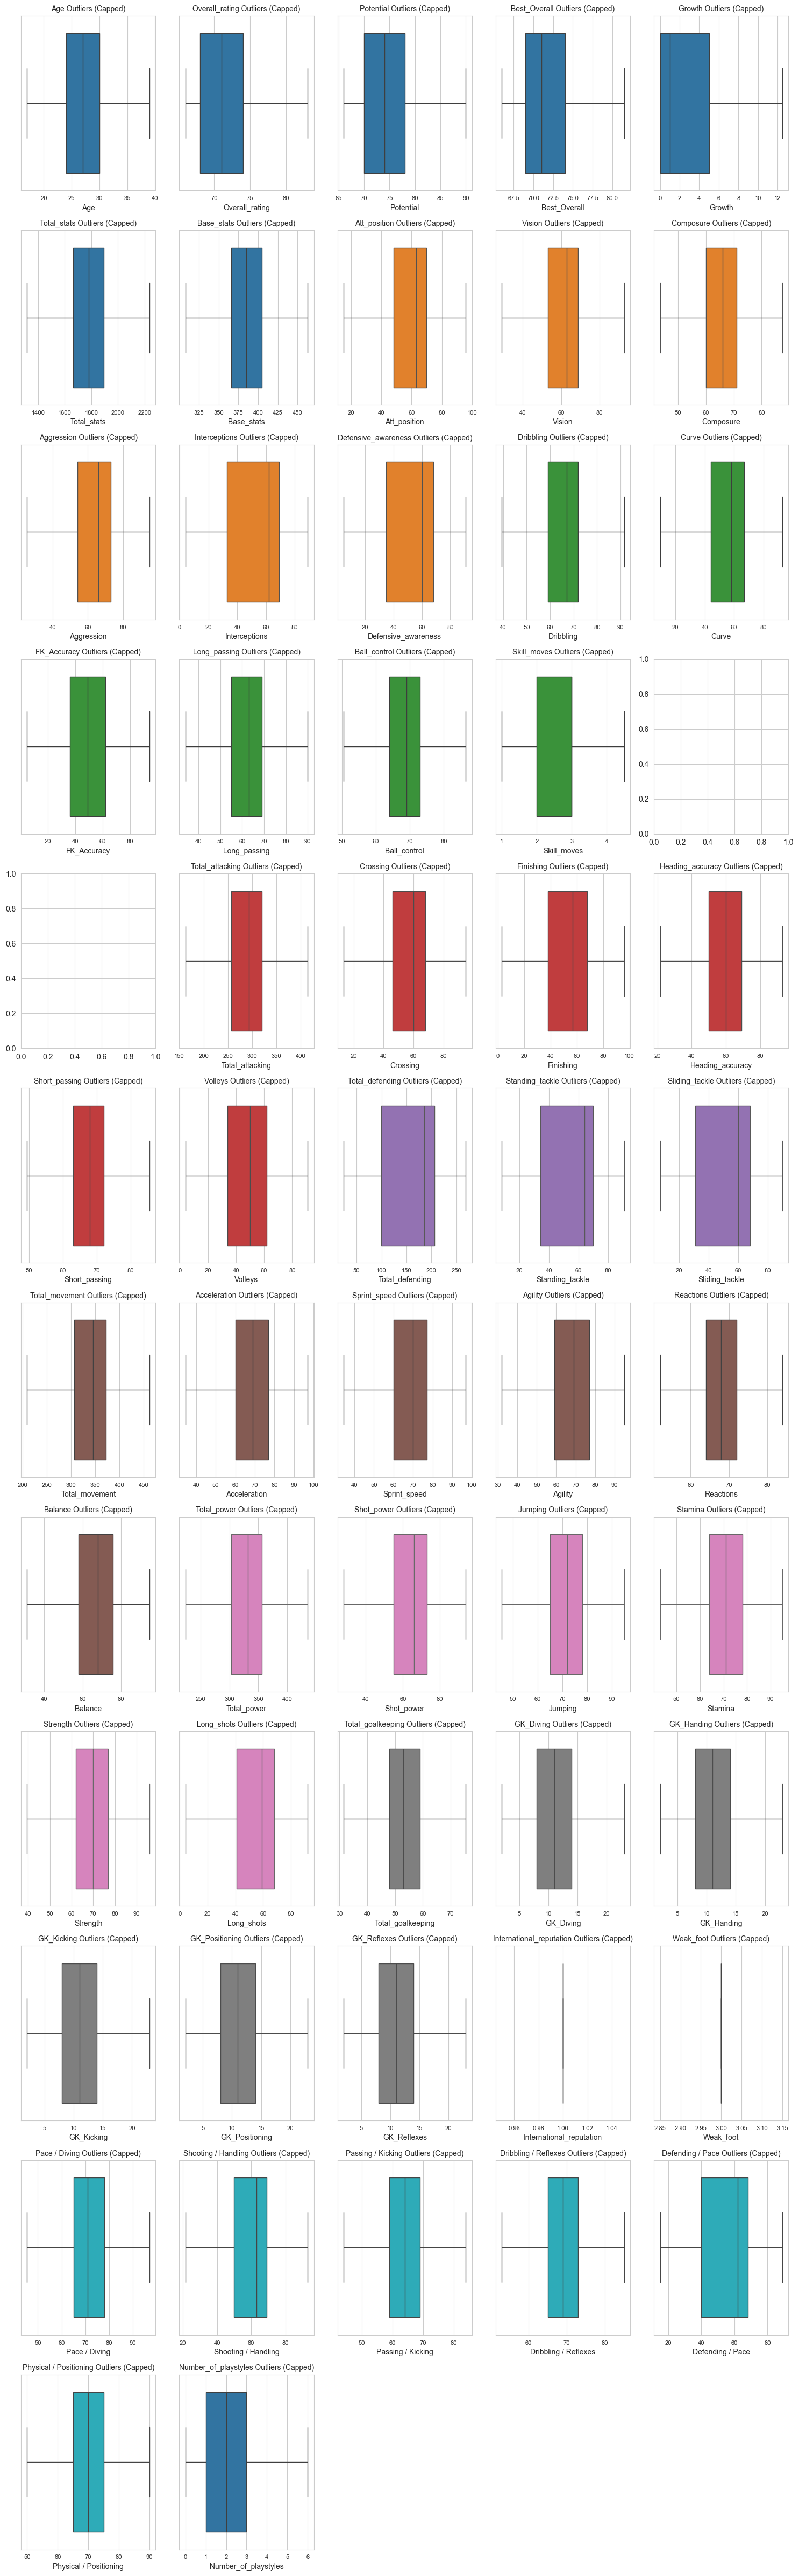

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame with the data

# Feature groups as per your request
feature_groups = {
    'General': ['Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Flatten the list of all features
all_features = [feat for feats in feature_groups.values() for feat in feats]

# Color Palette for the feature groups
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Function for capping outliers
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)
    return df

# Apply capping to outliers for each feature
for feature in all_features:
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        df = cap_outliers(df, feature)

# Replot the boxplots after capping outliers
n_features = len(all_features)
n_cols = 5  # Number of columns in the grid
n_rows = np.ceil(n_features / n_cols).astype(int)  # Number of rows (rounded up)

# Define the grid for plotting
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust height for larger number of rows
axes = axes.flatten()  # Flatten axes to iterate over

# Loop through the features and create boxplots
for i, feature in enumerate(all_features):
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        # Find the group that the feature belongs to
        group_name = None
        for group, features in feature_groups.items():
            if feature in features:
                group_name = group
                break

        # Ensure we do not exceed the number of axes available
        if i < len(axes):
            sns.boxplot(x=df[feature], color=group_color_map[group_name], ax=axes[i])
            axes[i].set_title(f'{feature} Outliers (Capped)', fontsize=10)
            axes[i].tick_params(axis='x', labelsize=8)
            axes[i].tick_params(axis='y', labelsize=8)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [17]:
# Print the number of rows and columns before removing duplicates
print("\n📊 Number of rows and columns before removing duplicates:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("="*50)

# Remove duplicate columns (based on column names or identical values)
# Remove columns with duplicate names
df_no_dup_col = df.loc[:, ~df.columns.duplicated()]  # Remove duplicated columns by name

# Remove columns with identical values across all rows
df_no_dup_col = df_no_dup_col.loc[:, ~df_no_dup_col.T.duplicated()]  # Corrected to use df_no_dup_col

# Remove duplicate rows
df = df_no_dup_col.drop_duplicates()

# Print the number of rows and columns after removing duplicates
print("\n✅ Number of rows and columns after removing duplicates:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


📊 Number of rows and columns before removing duplicates:
Rows: 9150, Columns: 74

✅ Number of rows and columns after removing duplicates:
Rows: 8873, Columns: 74


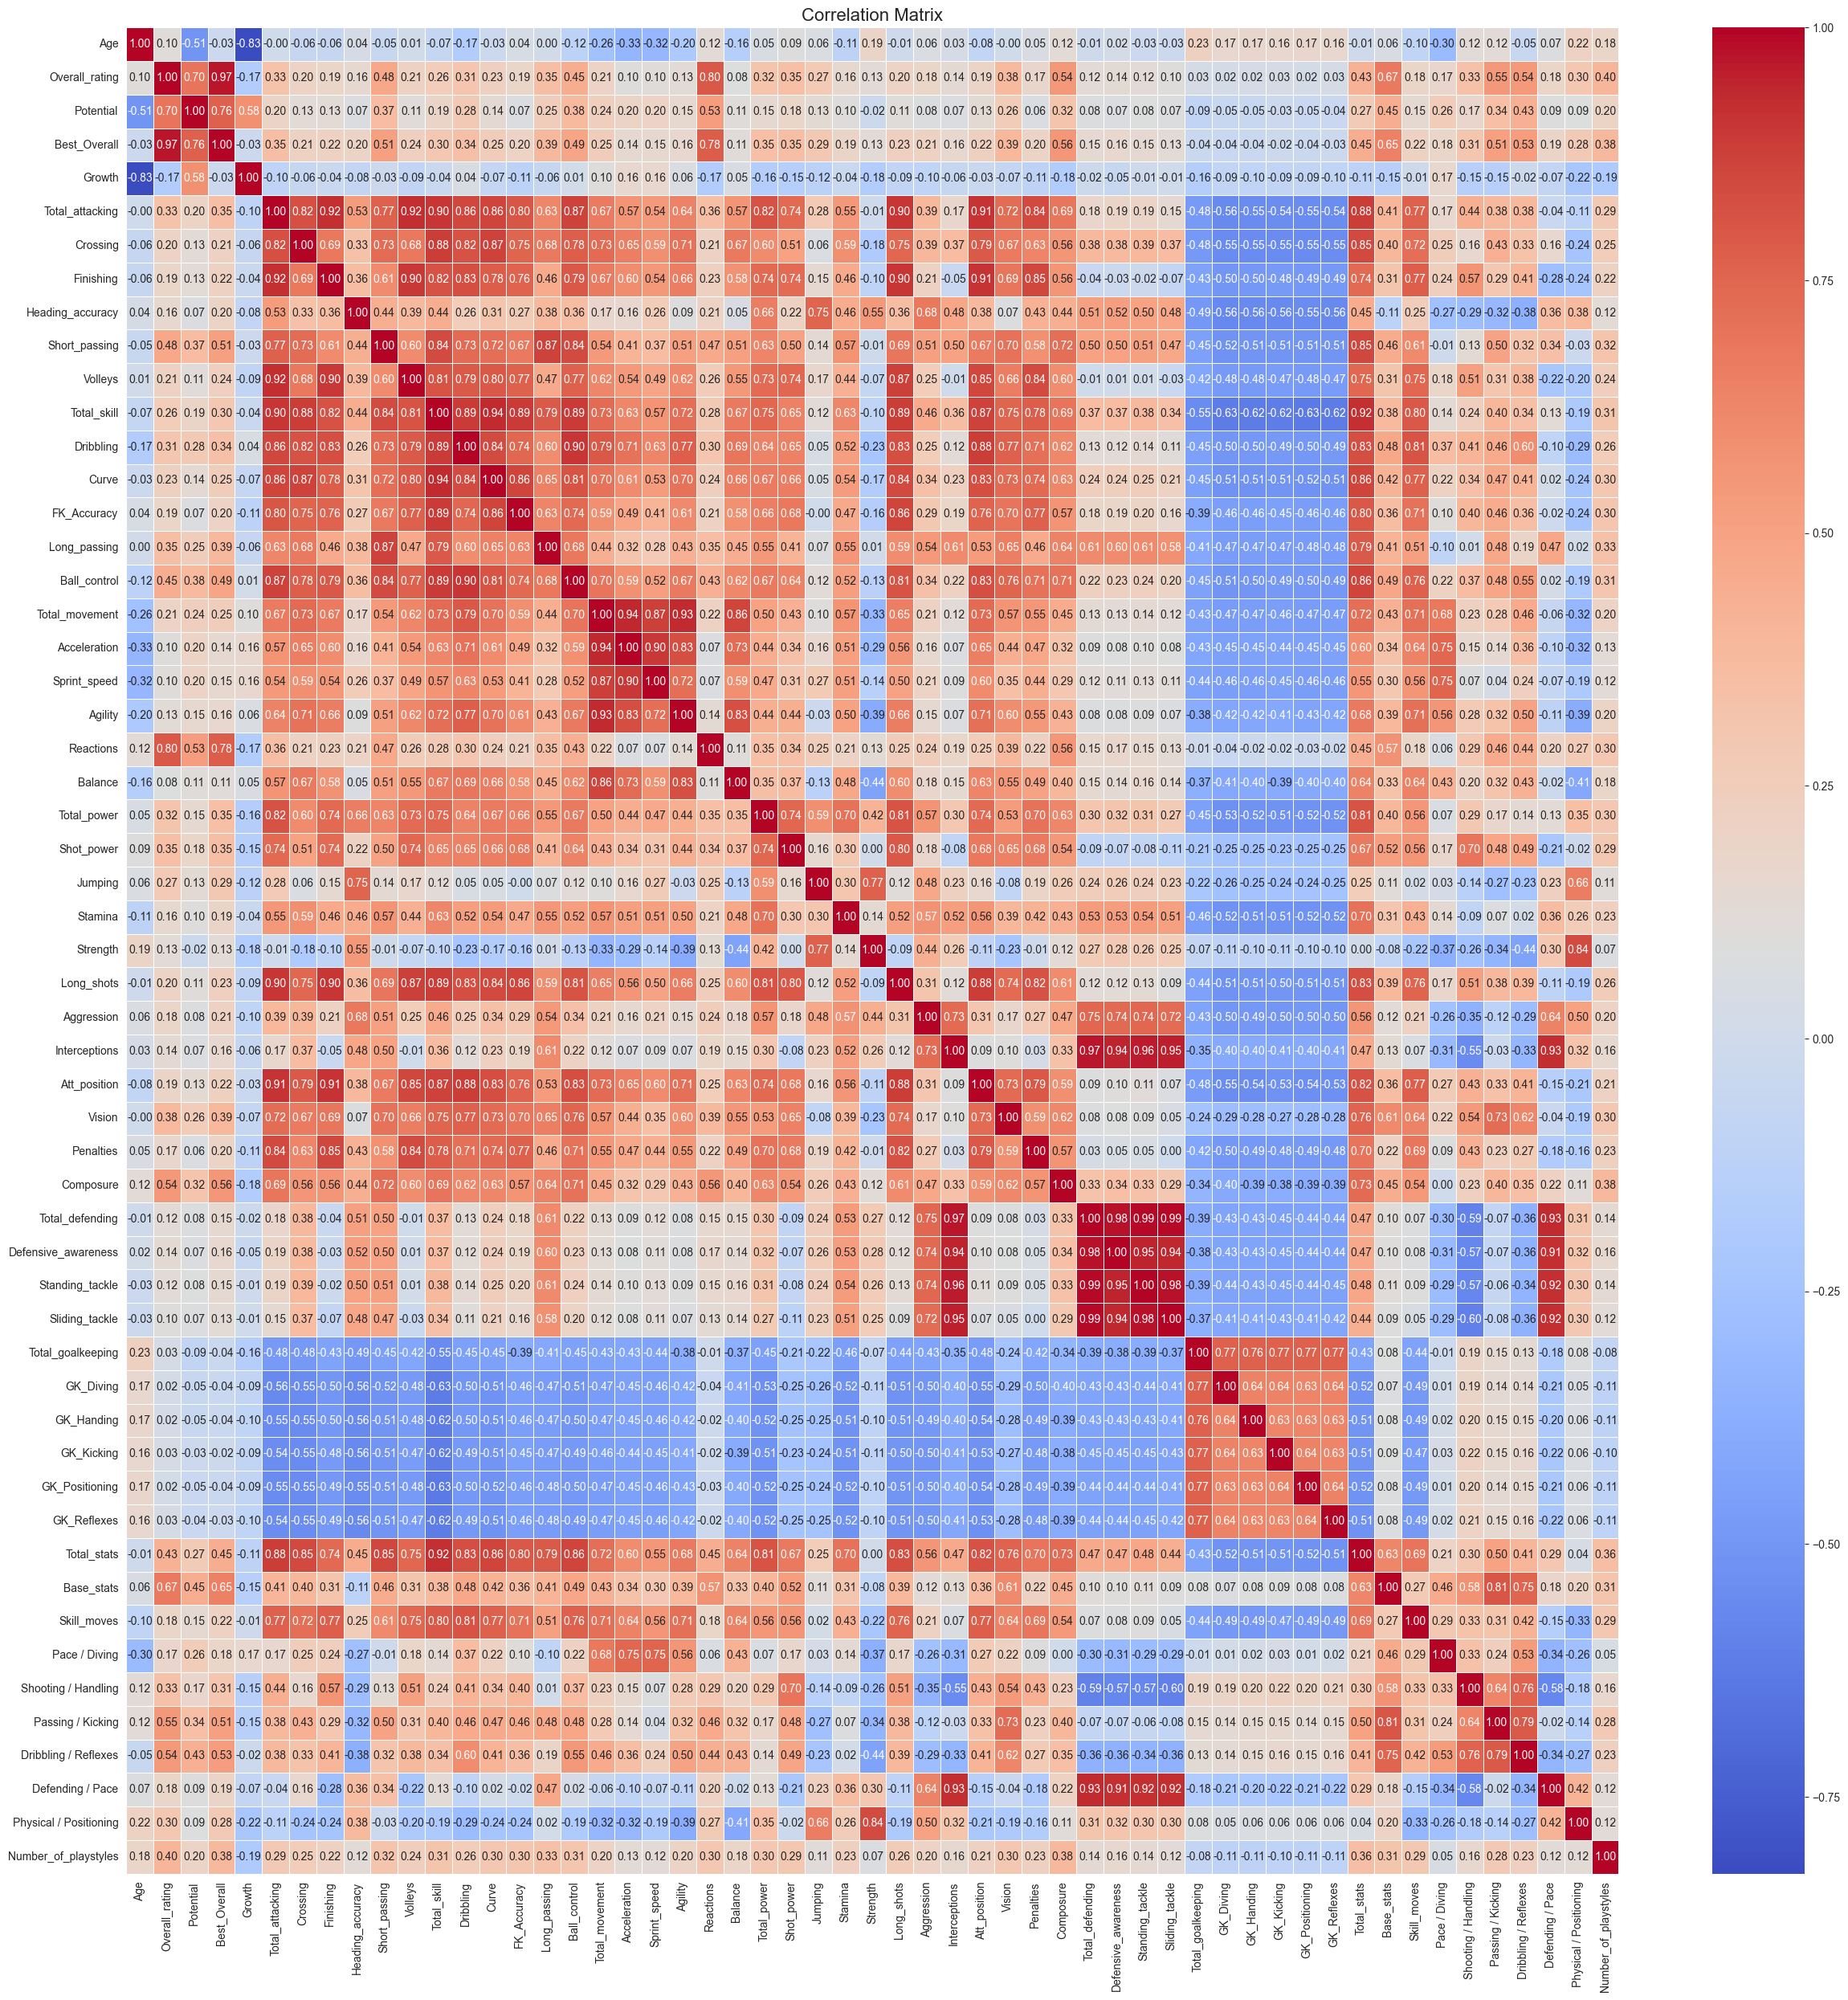

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Drop 'International_reputation' and 'Weak_foot' from the numeric columns
numeric_df = numeric_df.drop(columns=['International_reputation', 'Weak_foot'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and adjust layout
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

# Data Transformation (Label Encoder)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Your feature groups containing categorical features
feature_groups = {
    'Player Info': ['Height', 'Weight', 'Foot', 'Best_Position'],
    'Contract Details': ['Team&Contract', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause'],
    'Work Rates': ['Attacking_work_rate', 'Defensive_work_rate'],
    'Physical': ['Body_type', 'Real_face'],
    'Playstyles': ['PlayStyles', 'PlayStyles +', 'Acceleration_type']
}


# Flatten the list of categorical features
categorical_features = [feat for feats in feature_groups.values() for feat in feats]

# Label encoding for categorical features
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    if feature in df.columns:
        df[feature] = label_encoder.fit_transform(df[feature])

# Show a snippet of the transformed DataFrame
df[categorical_features].head()


Height  Weight  Foot  Best_Position  Team&Contract  Joined  Loan_date_end  \
0      23      26     1              1            587     692              3   
1      38      45     0             14           3080     692              3   
2      25      26     1             14           3534     688              3   
3      24      26     1              4           3069     209              3   
4      31      36     1             14           1728      91              3   

   Value  Wage  Release_clause  Attacking_work_rate  Defensive_work_rate  \
0      6    88               0                    2                    2   
1     48    56             357                    0                    2   
2     47    38             347                    0                    1   
3     15    58             163                    0                    2   
4     24    22             167                    0                    0   

   Body_type  Real_face  PlayStyles  PlayStyles +  Acceleration_type  
0          4          0        1815            14                  2  
1          9          1        1592             0                  2  
2          9          1         541            19                  4  
3          9          1         287            10                  0  
4          9          1        1107            10                  2

# Equilibre de data (SMOTE)

In [20]:
import plotly.express as px

# Calculer le nombre de joueurs par position
position_counts = df['Best_Position'].value_counts().reset_index()
position_counts.columns = ['Best_Position', 'Count']

# Créer un graphique à barres avec Plotly Express
fig = px.bar(
    position_counts,
    x='Best_Position',
    y='Count',
    title='Nombre de joueurs par position',
    color='Best_Position',  # Utiliser des couleurs différentes pour chaque position
    text='Count'  # Afficher les valeurs sur les barres
)

# Améliorer la mise en page
fig.update_layout(
    xaxis_title="Best Position",
    yaxis_title="Nombre de joueurs",
    showlegend=False,  # Cacher la légende si les barres sont déjà colorées
    hovermode="x unified"
)

# Afficher le graphique
fig.show()

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import plotly.express as px

# Step 1: Separate features (X) and target (y)
X = df.drop(columns=['Best_Position'])  # Assuming 'Best_Position' is the target
y = df['Best_Position']

# Step 2: Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Create data for visualization
# Before SMOTE
before_counts = pd.Series(y).value_counts().reset_index()
before_counts.columns = ['Class', 'Count']
before_counts['Type'] = 'Before SMOTE'

# After SMOTE
after_counts = pd.Series(y_resampled).value_counts().reset_index()
after_counts.columns = ['Class', 'Count']
after_counts['Type'] = 'After SMOTE'

# Combine data
combined_counts = pd.concat([before_counts, after_counts])

# Step 4: Create the visualization
fig = px.bar(
    combined_counts,
    x='Class',
    y='Count',
    color='Type',
    barmode='group',
    title='Class Distribution Before and After SMOTE',
    text='Count',
    color_discrete_map={
        'Before SMOTE': 'rgb(255, 182, 193)',  # Pink
        'After SMOTE': 'rgb(144, 238, 144)'    # Light green
    }
)

fig.update_layout(
    xaxis_title="Class",
    yaxis_title="Number of Samples",
    hovermode="x unified",
    legend_title=""
)

fig.show()

# Print class distributions
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({1: 1839, 14: 1172, 0: 1133, 5: 804, 2: 730, 4: 714, 11: 574, 10: 433, 6: 417, 7: 402, 13: 186, 12: 162, 9: 161, 8: 104, 3: 42})
Class distribution after SMOTE: Counter({1: 1839, 14: 1839, 4: 1839, 5: 1839, 3: 1839, 0: 1839, 8: 1839, 2: 1839, 12: 1839, 11: 1839, 6: 1839, 10: 1839, 7: 1839, 9: 1839, 13: 1839})


# Normalisation

In [22]:
from sklearn.preprocessing import MinMaxScaler
# Scale the features
y = y_resampled
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X_resampled.columns)
# combine the features and target
df= pd.concat([X, y.reset_index(drop=True)], axis=1)
# Check the scaled features
X.head()

Age  Overall_rating  Potential  Team&Contract    Height  Weight  Foot  \
0  0.453520        0.314902   0.343361       0.108263  0.489362    0.52   1.0   
1  0.227273        1.000000   1.000000       0.568056  0.808511    0.90   0.0   
2  0.318182        1.000000   1.000000       0.651789  0.531915    0.52   1.0   
3  0.681818        1.000000   1.000000       0.566027  0.510638    0.52   1.0   
4  0.545455        1.000000   1.000000       0.318702  0.659574    0.72   1.0   

   Best_Overall    Growth    Joined  ...  Pace / Diving  Shooting / Handling  \
0      0.398509  0.230987  0.480556  ...       0.476867             0.523273   
1      1.000000  0.240000  0.480556  ...       0.844660             1.000000   
2      1.000000  0.240000  0.477778  ...       1.000000             0.958042   
3      1.000000  0.000000  0.145139  ...       0.514563             0.930070   
4      1.000000  0.000000  0.063194  ...       0.456311             1.000000   

   Passing / Kicking  Dribbling / Reflexes  Defending / Pace  \
0             0.4888              0.475122          0.544092   
1             0.5500              0.843750          0.405405   
2             0.9000              1.000000          0.283784   
3             1.0000              1.000000          0.675676   
4             1.0000              0.937500          0.459459   

   Physical / Positioning  PlayStyles  PlayStyles +  Number_of_playstyles  \
0                0.483906    0.803097      0.518519              0.314000   
1                0.950000    0.704425      0.000000              0.500000   
2                0.700000    0.239381      0.703704              1.000000   
3                0.700000    0.126991      0.370370              1.000000   
4                0.825000    0.489823      0.370370              0.833333   

   Acceleration_type  
0                0.5  
1                0.5  
2                1.0  
3                0.0  
4                0.5  

[5 rows x 73 columns]

# Feature Selection

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import plotly.express as px

# Sélection des données
X = df.drop(columns=['Best_Position'])  # Assuming 'Best_Position' is the target variable
y = df['Best_Position']

# Appliquer SelectKBest avec le test f_classif
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, y)

# Création d'un DataFrame avec les scores de chaque caractéristique
feature_scores = pd.DataFrame({"Feature": X.columns, "Score": selector.scores_})
# Afficher les 20 meilleures caractéristiques
top_features = feature_scores.nlargest(20, 'Score').sort_values(by='Score', ascending=False)  # Trier du plus grand au plus petit
print(top_features)

# Tracer un graphique interactif des scores des caractéristiques
fig = px.bar(
    top_features,
    x='Score',
    y='Feature',
    orientation='h',  # Barres horizontales
    title='Top 20 Features by Score',
    labels={'Score': 'Score', 'Feature': 'Feature'},
    text='Score',
    color='Score',  # Colorer les barres en fonction des scores
    color_continuous_scale=px.colors.sequential.Agsunset_r,  # Palette de couleurs
)

# Mise en page améliorée
fig.update_layout(
    xaxis_title='Score',
    yaxis_title='Feature',
    title_font_size=20,  # Taille du titre augmentée
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=False, autorange='reversed'),  # Inverser l'ordre des barres
    coloraxis_colorbar=dict(title='Score'),
    font=dict(size=14),  # Taille de la police augmentée
    height=700,  # Hauteur du graphique augmentée
    width=900   # Largeur du graphique augmentée
)

# Afficher le graphique
fig.show()

                Feature        Score
40         Att_position  9991.377800
44      Total_defending  9474.343120
16            Finishing  9253.861401
20          Total_skill  9200.012659
47       Sliding_tackle  8655.782192
46      Standing_tackle  7880.033045
45  Defensive_awareness  7641.563184
15             Crossing  7162.553412
39        Interceptions  6853.113998
21            Dribbling  6173.402635
37           Long_shots  6024.880044
67     Defending / Pace  5968.127941
14      Total_attacking  5519.318871
19              Volleys  5254.353935
22                Curve  4645.806753
26       Total_movement  4531.291060
42            Penalties  4344.988263
17     Heading_accuracy  4329.633832
57          Skill_moves  4215.384389
27         Acceleration  4161.800289


# Data Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_new,  # Using the selected features from SelectKBest
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)
# Print the shapes of the new splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (22068, 20)
X_test shape: (5517, 20)
y_train shape: (22068,)
y_test shape: (5517,)


# Feature Selection with Random Forest




In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import plotly.express as px

# Sélection des données
X = df.drop(columns=['Best_Position'])  # Assuming 'Best_Position' is the target variable
y = df['Best_Position']

# Appliquer SelectKBest avec le test f_classif
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, y)

# Création d'un DataFrame avec les scores de chaque caractéristique
feature_scores = pd.DataFrame({"Feature": X.columns, "Score": selector.scores_})
# Afficher les 20 meilleures caractéristiques
top_features = feature_scores.nlargest(20, 'Score').sort_values(by='Score', ascending=False)  # Trier du plus grand au plus petit
print(top_features)

# Tracer un graphique interactif des scores des caractéristiques
fig = px.bar(
    top_features,
    x='Score',
    y='Feature',
    orientation='h',  # Barres horizontales
    title='Top 20 Features by Score',
    labels={'Score': 'Score', 'Feature': 'Feature'},
    text='Score',
    color='Score',  # Colorer les barres en fonction des scores
    color_continuous_scale=px.colors.sequential.Agsunset_r,  # Palette de couleurs
)

# Mise en page améliorée
fig.update_layout(
    xaxis_title='Score',
    yaxis_title='Feature',
    title_font_size=20,  # Taille du titre augmentée
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=False, autorange='reversed'),  # Inverser l'ordre des barres
    coloraxis_colorbar=dict(title='Score'),
    font=dict(size=14),  # Taille de la police augmentée
    height=700,  # Hauteur du graphique augmentée
    width=900   # Largeur du graphique augmentée
)

# Afficher le graphique
fig.show()

                Feature        Score
40         Att_position  9991.377800
44      Total_defending  9474.343120
16            Finishing  9253.861401
20          Total_skill  9200.012659
47       Sliding_tackle  8655.782192
46      Standing_tackle  7880.033045
45  Defensive_awareness  7641.563184
15             Crossing  7162.553412
39        Interceptions  6853.113998
21            Dribbling  6173.402635
37           Long_shots  6024.880044
67     Defending / Pace  5968.127941
14      Total_attacking  5519.318871
19              Volleys  5254.353935
22                Curve  4645.806753
26       Total_movement  4531.291060
42            Penalties  4344.988263
17     Heading_accuracy  4329.633832
57          Skill_moves  4215.384389
27         Acceleration  4161.800289


# XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report, roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Définir la grille de recherche pour RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Limiter à 50 itérations aléatoires
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Entraîner la recherche d'hyperparamètres
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Réentraînement avec les meilleurs hyperparamètres
xgb_best = random_search.best_estimator_
xgb_best.fit(X_train, y_train)

# Évaluation
y_pred = xgb_best.predict(X_test)
y_pred_proba = xgb_best.predict_proba(X_test)

# Calcul des métriques
accuracy_xgb = accuracy_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred, average='weighted')
precision_xgb = precision_score(y_test, y_pred, average='weighted')
f1_xgb = f1_score(y_test, y_pred, average='weighted')
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

# Afficher les résultats
print("\nXGBoost Classification Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"ROC AUC: {roc_auc_xgb:.4f}")

# Rapport de classification détaillé
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}

XGBoost Classification Metrics:
Accuracy: 0.8724
Recall: 0.8724
Precision: 0.8714
F1 Score: 0.8713
ROC AUC: 0.9932

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       367
           1       0.94      0.92      0.93       368
           2       0.89      0.88      0.88       368
           3       0.95      0.99      0.97       368
           4       0.84      0.90      0.87       368
           5       1.00      1.00      1.00       368
           6       0.79      0.78      0.79       368
           7       0.80      0.70      0.74       368
           8       0.88      0.93      0.91       368
           9       0.89      0.94      0.92       367
         

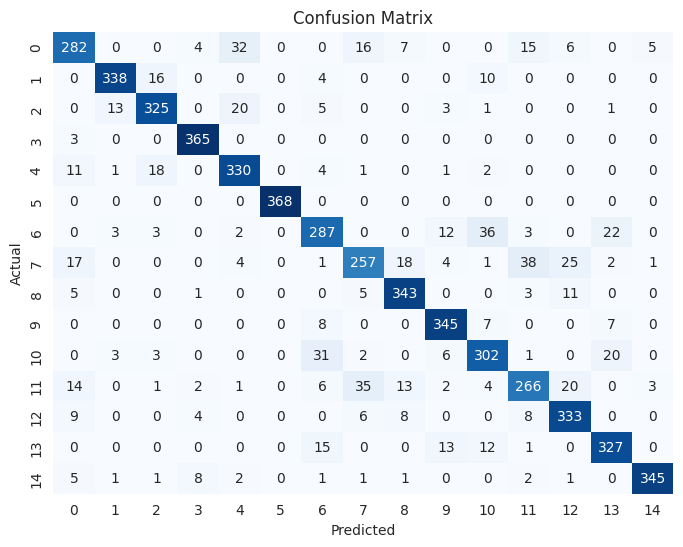

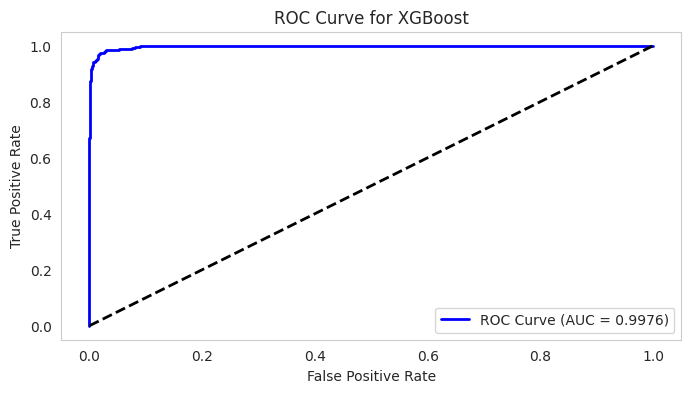

In [ ]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Courbe ROC

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=xgb_best.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# CatBoost Classifier

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score

# Initialisation du modèle CatBoost avec des hyperparamètres ajustés
cat_model = CatBoostClassifier(
    iterations=4000,                # Moins d'itérations si convergence rapide
    learning_rate=0.05,              # Taux d'apprentissage plus élevé
    depth=6,                        # Profondeur plus faible = plus rapide + moins de surapprentissage
    l2_leaf_reg=20,                 # Régularisation modérée
    bagging_temperature=0.5,        # Moins de diversité pour une convergence plus stable
    random_strength=1,              # Moins de bruit pour un modèle plus stable
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=100,       # Arrêt plus rapide si surapprentissage
    auto_class_weights='Balanced',
    bootstrap_type='Bayesian',      # Meilleure régularisation
    grow_policy='Lossguide',        # Politique de croissance plus efficace pour gros datasets
    max_leaves=31,                  # Contrôle du nombre de feuilles (utile avec Lossguide)
    boosting_type='Plain'           # Mode boosting plus rapide (vs 'Ordered')
)


# Entraînement
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Prédictions
y_pred_cat = cat_model.predict(X_test)
y_proba_cat = cat_model.predict_proba(X_test)


# Scores - Test
acc_test = accuracy_score(y_test, y_pred_cat)
f1_test = f1_score(y_test, y_pred_cat, average='weighted')
precision = precision_score(y_test, y_pred_cat, average='weighted')
recall = recall_score(y_test, y_pred_cat, average='weighted')

# ROC AUC
if len(cat_model.classes_) == 2:
    roc_auc = roc_auc_score(y_test, y_proba_cat[:, 1])
else:
    roc_auc = roc_auc_score(y_test, y_proba_cat, multi_class='ovr', average='weighted')

 # 🔍 Résultats
print("\n📊 Résultats CatBoost - Test :")
print(f"Accuracy: {acc_test:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Rapport complet
print("\n📝 Rapport de classification :")
print(classification_report(y_test, y_pred_cat))


0:	learn: 0.4248810	test: 0.4251075	best: 0.4251075 (0)	total: 56.7ms	remaining: 3m 46s
100:	learn: 0.6326115	test: 0.6057839	best: 0.6061464 (98)	total: 5.35s	remaining: 3m 26s
200:	learn: 0.6790572	test: 0.6436655	best: 0.6436657 (199)	total: 9.88s	remaining: 3m 6s
300:	learn: 0.7019404	test: 0.6576220	best: 0.6576220 (300)	total: 13.9s	remaining: 2m 50s
400:	learn: 0.7227848	test: 0.6694044	best: 0.6699477 (397)	total: 17.8s	remaining: 2m 39s
500:	learn: 0.7398225	test: 0.6828166	best: 0.6829979 (493)	total: 21.6s	remaining: 2m 31s
600:	learn: 0.7547758	test: 0.6940546	best: 0.6949608 (588)	total: 25.5s	remaining: 2m 24s
700:	learn: 0.7655153	test: 0.7007608	best: 0.7007608 (700)	total: 29.2s	remaining: 2m 17s
800:	learn: 0.7769339	test: 0.7072866	best: 0.7072866 (800)	total: 32.9s	remaining: 2m 11s
900:	learn: 0.7870835	test: 0.7136300	best: 0.7138113 (898)	total: 36.7s	remaining: 2m 6s
1000:	learn: 0.7994540	test: 0.7203374	best: 0.7205185 (997)	total: 40.4s	remaining: 2m 1s
1100:

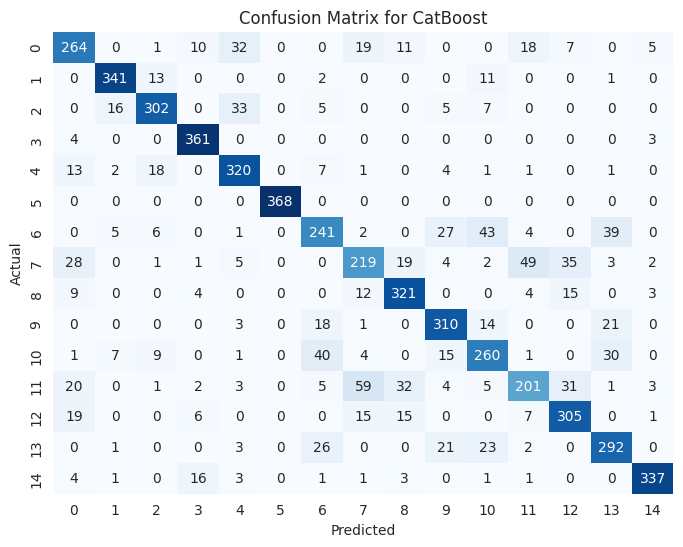

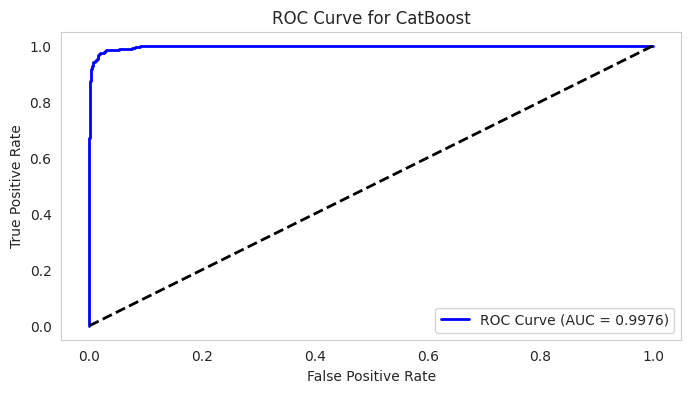

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

cm = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for CatBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Roc curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=xgb_best.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for CatBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Random Forest Classifier

Fitting 3 folds for each of 30 candidates, totalling 90 fits
✅ Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'class_weight': 'balanced'}

📊 Test Metrics:
Accuracy (Test): 0.8704
F1 Score (Test): 0.8686
Precision (Test): 0.8700
Recall (Test): 0.8704
ROC AUC (Test): 0.9921

📝 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       367
           1       0.95      0.90      0.92       368
           2       0.86      0.87      0.86       368
           3       0.93      0.99      0.96       368
           4       0.83      0.89      0.86       368
           5       1.00      1.00      1.00       368
           6       0.83      0.80      0.81       368
           7       0.83      0.71      0.77       368
           8       0.87      0.95      0.91       368
           9       0.88      0.93      0.91       367
          10  

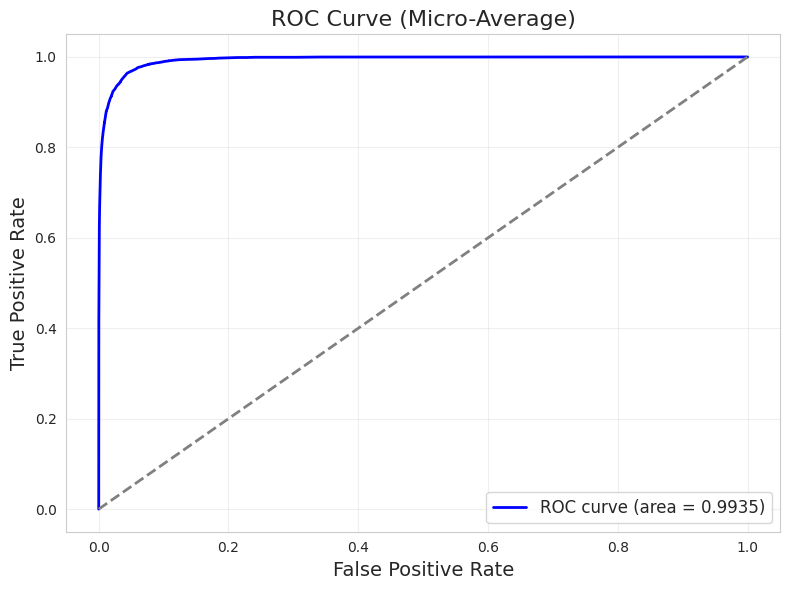

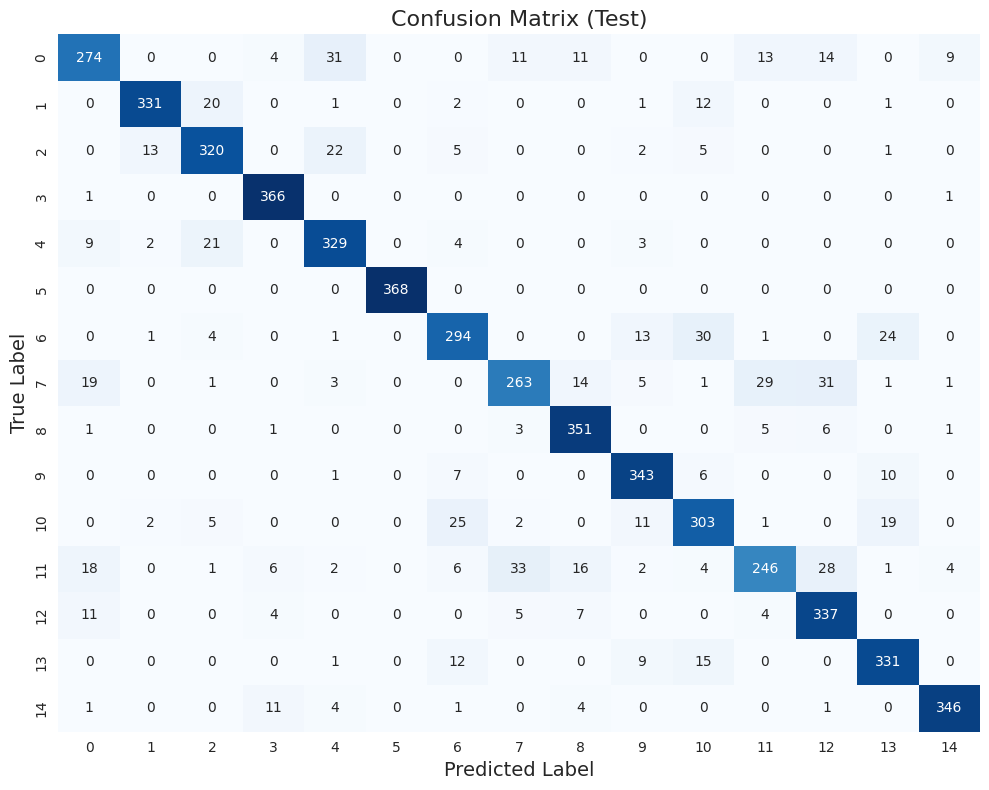

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Étendre les hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Initialiser le modèle
rf_model = RandomForestClassifier(random_state=42)

# RandomizedSearchCV avec plus d'itérations
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=30,  # Augmenter les itérations
    scoring='f1_weighted',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Entraîner la recherche d'hyperparamètres
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params = random_search.best_params_
print("✅ Best Hyperparameters:", best_params)

# Réentraînement avec les meilleurs hyperparamètres
rf_best = random_search.best_estimator_
rf_best.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_best.predict(X_test)

# Calcul des probabilités pour le ROC AUC
y_pred_proba_rf = rf_best.predict_proba(X_test)

# Calcul des métriques pour l'ensemble de test
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Calcul du ROC AUC
if len(rf_best.classes_) == 2:  # Problème binaire
    roc_auc = roc_auc_score(y_test, y_pred_proba_rf[:, 1])
else:  # Problème multi-classes
    roc_auc = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr', average='weighted')

# Afficher les métriques
print("\n📊 Test Metrics:")
print(f"Accuracy (Test): {accuracy_rf:.4f}")
print(f"F1 Score (Test): {f1_rf:.4f}")
print(f"Precision (Test): {precision_rf:.4f}")
print(f"Recall (Test): {recall_rf:.4f}")
print(f"ROC AUC (Test): {roc_auc:.4f}")

# Afficher un rapport de classification détaillé
print("\n📝 Classification Report (Test):")
print(classification_report(y_test, y_pred_rf))

# Tracer la courbe ROC (uniquement pour les problèmes binaires)
if len(rf_best.classes_) == 2:
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_rf[:, 1], pos_label=rf_best.classes_[1])
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot the ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.4f})')

    # Plot diagonal line for random guessing
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

    # Add labels, title, and legend
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve (Test)', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ ROC curve not shown: This is not a binary classification problem.")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#  LightGBM Model

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5099
[LightGBM] [Info] Number of data points in the train set: 22068, number of used features: 20
[LightGBM] [Info] Start training from score -2.707507
[LightGBM] [Info] Start training from score -2.708186
[LightGBM] [Info] Start training from score -2.708186
[LightGBM] [Info] Start training from score -2.708186
[LightGBM] [Info] Start training from score -2.708186
[LightGBM] [Info] Start training from score -2.708186
[LightGBM] [Info] Start training from score -2.708186
[LightGBM] [Info] Start training from score -2.708186
[LightGBM] [Info] Start training from score -2.708186
[LightGBM] [Info] Start training from score -2.707507
[LightGBM] [Info] Start training from score -2.708186
[LightGBM] [Info] Start training from score -2.707507
[

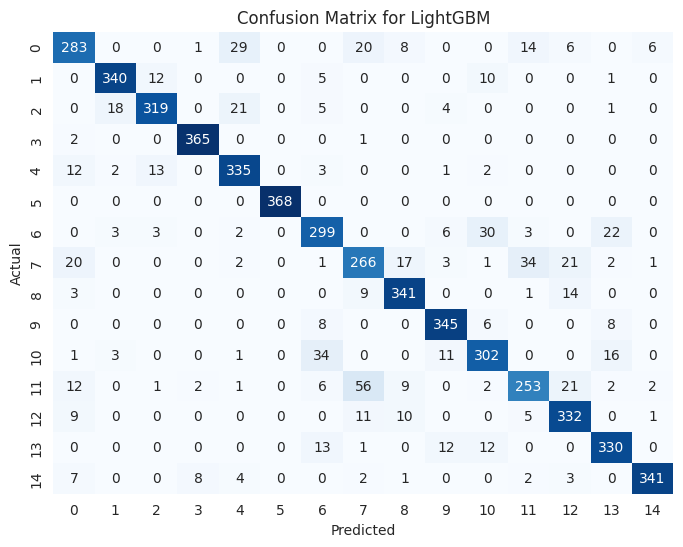

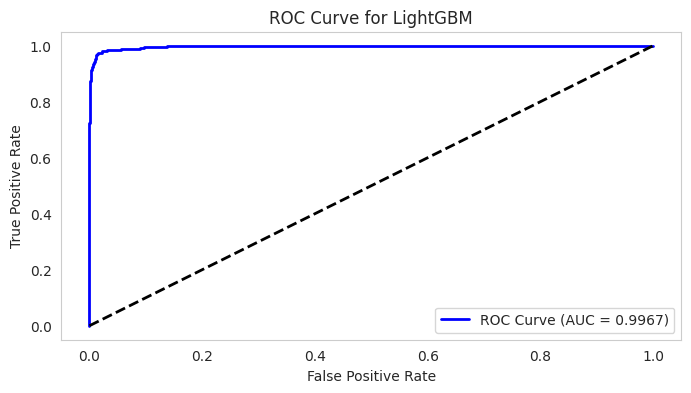

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report, roc_curve, auc, confusion_matrix

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],  # -1 means no limit
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0, 0.5, 1]
}

# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42, objective='multiclass') # Use multiclass objective for multi-class classification


random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Train the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


# Retrain with the best hyperparameters
lgb_best = random_search.best_estimator_
lgb_best.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_best.predict(X_test)
y_pred_proba_lgb = lgb_best.predict_proba(X_test)


# Calculate metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb, multi_class='ovr', average='weighted')

# Print the results
print("\nLightGBM Classification Metrics:")
print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"Recall: {recall_lgb:.4f}")
print(f"Precision: {precision_lgb:.4f}")
print(f"F1 Score: {f1_lgb:.4f}")
print(f"ROC AUC: {roc_auc_lgb:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lgb[:, 1], pos_label=lgb_best.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Stacking Classifier

In [48]:
# prompt: effectuer un stacking pour les 3 model les plus performant

import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming xgb_best, cat_model, and rf_best are your trained models
estimators = [
    ('xgb', xgb_best),
    ('catboost', cat_model),
    ('random_forest', rf_best)
]

# Initialize the stacking classifier with a Logistic Regression final estimator
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000), # Increased max_iter
    cv=5,
    stack_method='predict_proba',  # Use probabilities for stacking
    n_jobs=-1
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test)
y_pred_proba_stacking = stacking_model.predict_proba(X_test)

# Evaluate the stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking, average='weighted')
print(f"Stacking Model - Accuracy: {accuracy_stacking:.4f}")
print(f"Stacking Model - F1 Score: {f1_stacking:.4f}")

# Precision et Recall
precision_stacking = precision_score(y_test, y_pred_stacking, average='weighted')
recall_stacking = recall_score(y_test, y_pred_stacking, average='weighted')
print(f"Stacking Model - Precision: {precision_stacking:.4f}")
print(f"Stacking Model - Recall: {recall_stacking:.4f}")

# ROC AUC Score (macro, pour multi-classes)
roc_auc_stacking = roc_auc_score(y_test, y_pred_proba_stacking, multi_class='ovr', average='macro')
print(f"Stacking Model - ROC AUC: {roc_auc_stacking:.4f}")

# Rapport de classification détaillé
print("\n📝 Classification Report (Stacking):")
print(classification_report(y_test, y_pred_stacking, digits=4))

Stacking Model - Accuracy: 0.8847
Stacking Model - F1 Score: 0.8843
Stacking Model - Precision: 0.8843
Stacking Model - Recall: 0.8847
Stacking Model - ROC AUC: 0.9940

📝 Classification Report (Stacking):
              precision    recall  f1-score   support

           0     0.7978    0.7956    0.7967       367
           1     0.9392    0.9239    0.9315       368
           2     0.8917    0.8723    0.8819       368
           3     0.9654    0.9864    0.9758       368
           4     0.8557    0.9022    0.8783       368
           5     1.0000    1.0000    1.0000       368
           6     0.8155    0.8288    0.8221       368
           7     0.8239    0.7500    0.7852       368
           8     0.9243    0.9293    0.9268       368
           9     0.9081    0.9428    0.9251       367
          10     0.8365    0.8478    0.8421       368
          11     0.7857    0.7493    0.7671       367
          12     0.8688    0.8995    0.8838       368
          13     0.8830    0.9022    0

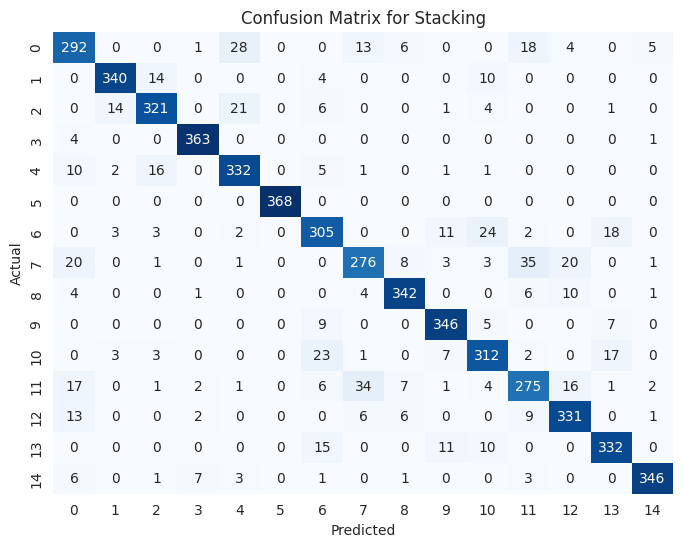

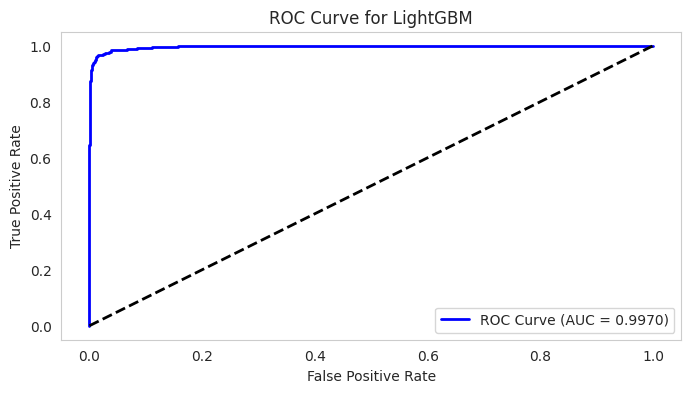

In [50]:

from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred_stacking are defined from the previous code
# Compute the confusion matrix
cm_stacking = confusion_matrix(y_test, y_pred_stacking)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Stacking')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_stacking[:, 1], pos_label=stacking_model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# VotingClassifier

0:	learn: 0.4248810	total: 55.5ms	remaining: 3m 42s
100:	learn: 0.6326115	total: 5.34s	remaining: 3m 26s
200:	learn: 0.6790572	total: 9.74s	remaining: 3m 4s
300:	learn: 0.7019404	total: 13.6s	remaining: 2m 47s
400:	learn: 0.7227848	total: 17.5s	remaining: 2m 36s
500:	learn: 0.7398225	total: 21.2s	remaining: 2m 28s
600:	learn: 0.7547758	total: 24.9s	remaining: 2m 20s
700:	learn: 0.7655153	total: 28.6s	remaining: 2m 14s
800:	learn: 0.7769339	total: 32.2s	remaining: 2m 8s
900:	learn: 0.7870835	total: 35.9s	remaining: 2m 3s
1000:	learn: 0.7994540	total: 39.6s	remaining: 1m 58s
1100:	learn: 0.8085609	total: 43.3s	remaining: 1m 53s
1200:	learn: 0.8158559	total: 46.8s	remaining: 1m 49s
1300:	learn: 0.8238766	total: 50.4s	remaining: 1m 44s
1400:	learn: 0.8311717	total: 54.1s	remaining: 1m 40s
1500:	learn: 0.8367451	total: 57.7s	remaining: 1m 36s
1600:	learn: 0.8419560	total: 1m 1s	remaining: 1m 31s
1700:	learn: 0.8486620	total: 1m 5s	remaining: 1m 27s
1800:	learn: 0.8540088	total: 1m 8s	remain

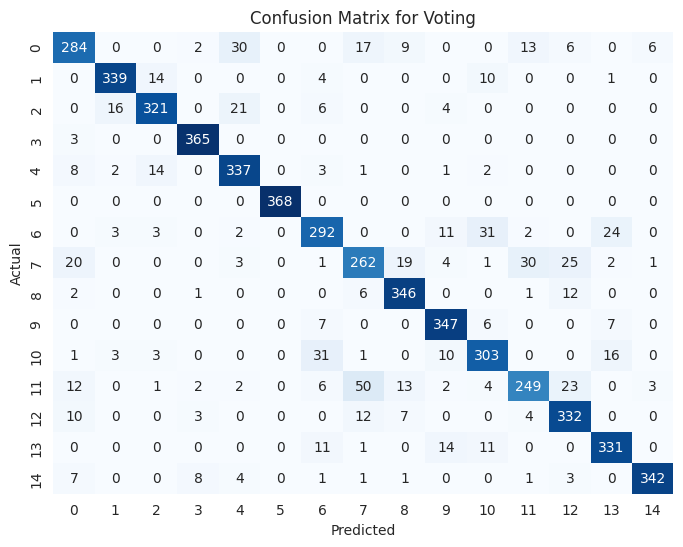

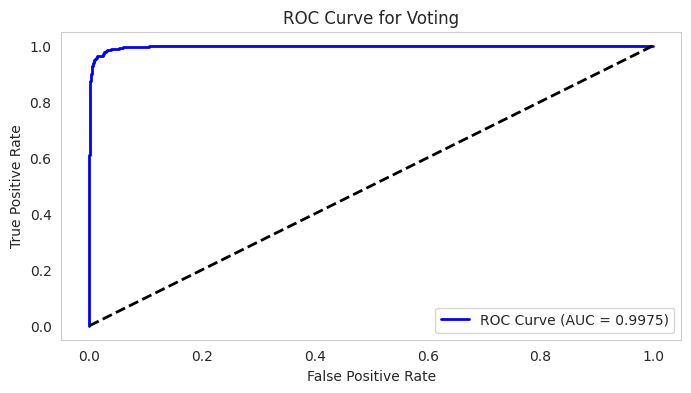

In [51]:

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming xgb_best, cat_model, and rf_best are your trained models
estimators = [
    ('xgb', xgb_best),
    ('catboost', cat_model),
    ('random_forest', rf_best),
    ('lgbm', lgb_best)
]

# Create a voting classifier with 'soft' voting (predicting probabilities)
voting_model = VotingClassifier(estimators=estimators, voting='soft')

# Train the voting classifier
voting_model.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_model.predict(X_test)
y_pred_proba_voting = voting_model.predict_proba(X_test)

# Evaluate the voting model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

print(f"Voting Model - Accuracy: {accuracy_voting:.4f}")
print(f"Voting Model - F1 Score: {f1_voting:.4f}")

# Precision et Recall
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')
print(f"Voting Model - Precision: {precision_voting:.4f}")
print(f"Voting Model - Recall: {recall_voting:.4f}")


# ROC AUC Score
roc_auc_voting = roc_auc_score(y_test, y_pred_proba_voting, multi_class='ovr', average='weighted')
print(f"Voting Model - ROC AUC: {roc_auc_voting:.4f}")

# Classification Report
print("\nClassification Report (Voting):")
print(classification_report(y_test, y_pred_voting, digits=4))

# Confusion Matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Voting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_voting[:, 1], pos_label=voting_model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Voting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Models Comparison

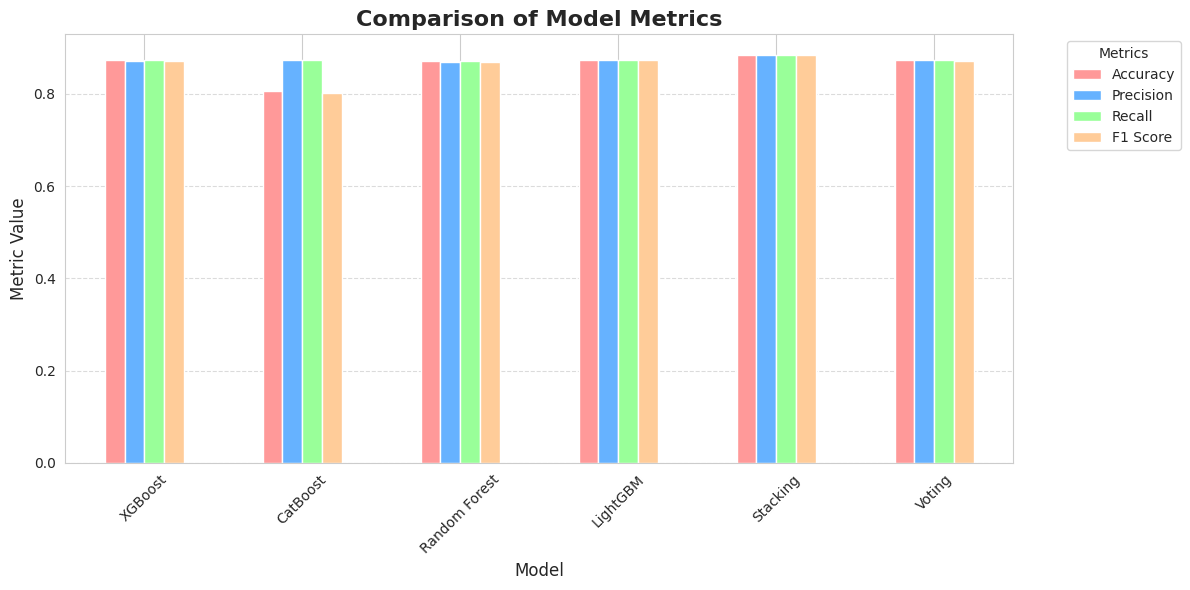

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer un dictionnaire contenant les métriques pour chaque modèle
metrics_comparison = {
    "Model": ["XGBoost", "CatBoost", "Random Forest", "LightGBM", "Stacking", "Voting"],
    "Accuracy": [accuracy_xgb, acc_test, accuracy_rf, accuracy_lgb, accuracy_stacking, accuracy_voting],
    "Precision": [precision_xgb, precision , precision_rf, precision_lgb, precision_stacking, precision_voting],
    "Recall": [recall_xgb, recall, recall_rf, recall_lgb, recall_stacking, recall_voting],
    "F1 Score": [f1_xgb, f1_test , f1_rf, f1_lgb, f1_stacking, f1_voting],
    "ROC AUC": [roc_auc_xgb, roc_auc, roc_auc, roc_auc_lgb, roc_auc_stacking, roc_auc_voting]
}

# Convertir le dictionnaire en DataFrame
metrics_df = pd.DataFrame(metrics_comparison)

# Définir des couleurs personnalisées
custom_colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#C299FF", "#FFB266", "#FF6666", "#99CCFF", "#CCFF99", "#FFFF99", "#FF99CC"]

# Optionnel : Afficher le tableau sous forme de graphique pour une meilleure visualisation
metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6), color=custom_colors, rot=45)
plt.title("Comparison of Model Metrics", fontsize=16, fontweight="bold")
plt.ylabel("Metric Value", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


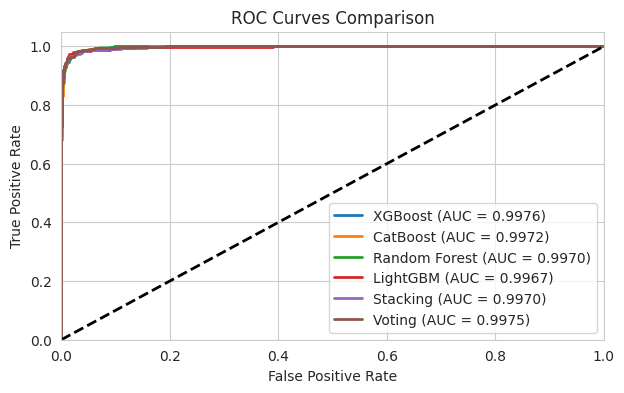

In [66]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming xgb_best, cat_model, rf_best, lgb_best, stacking_model, and voting_model are defined
models = {
    "XGBoost": xgb_best,
    "CatBoost": cat_model,
    "Random Forest": rf_best,
    "LightGBM": lgb_best,
    "Stacking": stacking_model,
    "Voting": voting_model
}

plt.figure(figsize=(7, 4))

for model_name, model in models.items():
    if model_name == "Stacking" or model_name == "Voting":
        y_pred_proba = model.predict_proba(X_test)
    else:
        y_pred_proba = model.predict_proba(X_test)

    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(np.unique(y_test))):
      fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=model.classes_[i])
      roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class, choosing one class for visualization
    plt.plot(fpr[1], tpr[1], lw=2, label=f'{model_name} (AUC = {roc_auc[1]:.4f})')


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()


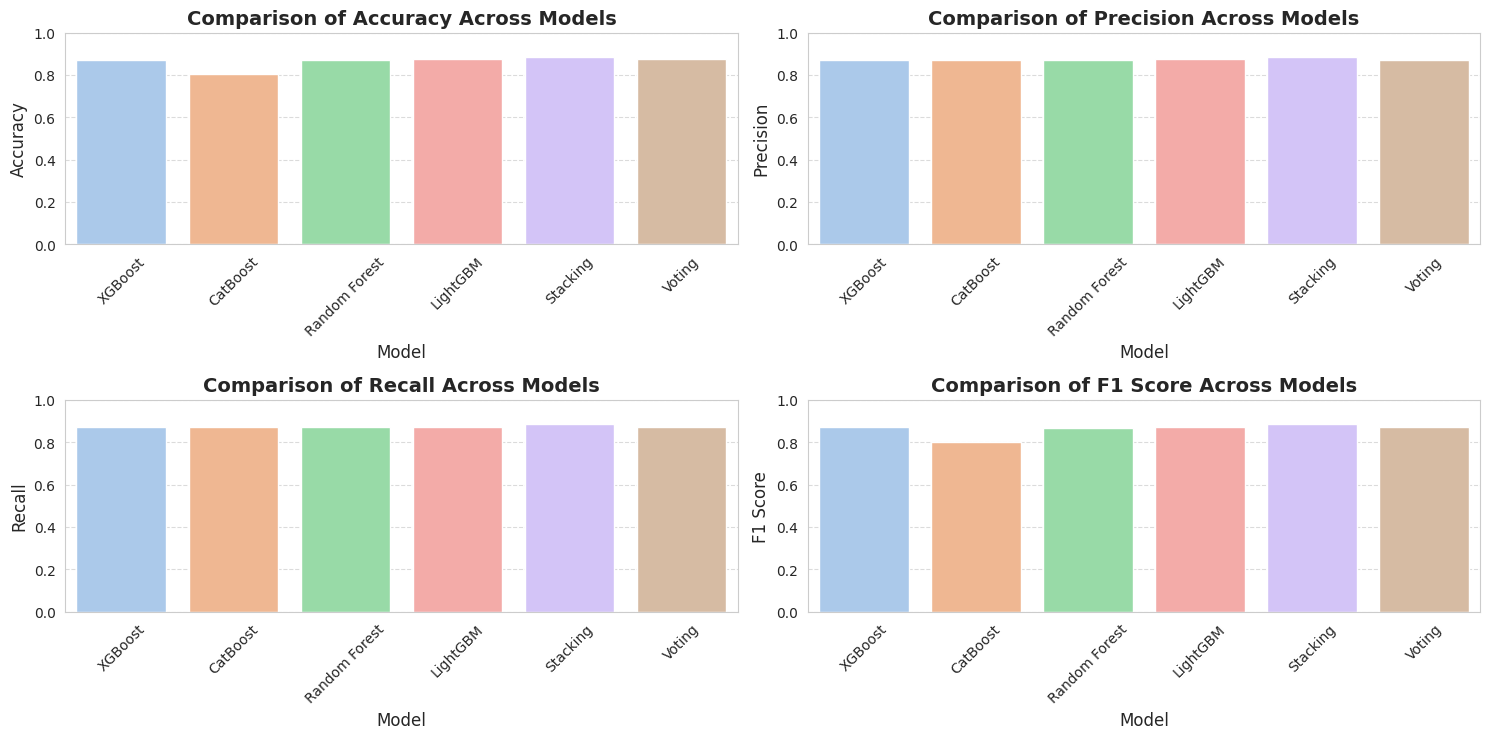

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les métriques et les modèles
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
models = metrics_df["Model"].tolist() # Convert models to a list

# Tracer un graphique pour chaque métrique
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x=models, y=metrics_df[metric], palette="pastel")
    plt.title(f"Comparison of {metric} Across Models", fontsize=14, fontweight="bold")
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Model", fontsize=12)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Les métriques sont comprises entre 0 et 1
    plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

In [67]:
# Display the metrics comparison table
metrics_df


Model  Accuracy  Precision    Recall  F1 Score  \
0        XGBoost  0.872394   0.871440  0.872394  0.871264   
1       CatBoost  0.805148   0.872700  0.873301  0.802535   
2  Random Forest  0.870401   0.869978  0.870401  0.868622   
3       LightGBM  0.873482   0.873225  0.873482  0.872662   
4       Stacking  0.884720   0.884347  0.884720  0.884261   
5         Voting  0.873301   0.872700  0.873301  0.871984   

                                             ROC AUC  
0                                           0.993227  
1  {0: 0.9871193883759689, 1: 0.9974504336004458,...  
2  {0: 0.9871193883759689, 1: 0.9974504336004458,...  
3                                           0.993139  
4                                            0.99395  
5                                           0.993215

# 🔚 Conclusion:
Après avoir comparé plusieurs modèles de classification (XGBoost, CatBoost, Random Forest, LightGBM, Voting, et Stacking), nous avons constaté que le modèle Stacking se démarque nettement des autres en termes de performance globale.

Il obtient les meilleurs résultats sur tous les indicateurs clés :


*   Accuracy: : 88.47 %
*   F1 Score : 0.884
*   ROC AUC : 0.99395


Cela indique que le modèle Stacking offre un excellent compromis entre précision, rappel, et généralisation, tout en conservant une très bonne capacité de séparation entre les classes.

✅ Conclusion : Le modèle Stacking est le plus performant et constitue donc le meilleur choix pour notre problème de classification.